# NLP with PyTorch Cheat Sheet

<!--- Start of badges -->
<!-- Badges: python,pytorch,machinelearning,nlp -->

<!--- End of badges -->

This notebook provides a comprehensive cheat sheet for Natural Language Processing (NLP) tasks using PyTorch, based on material from the ['Generative AI and LLMs: Architecture and Data Preparation'](https://www.coursera.org/learn/generative-ai-llm-architecture-data-preparation/home/welcome), ['Gen AI Foundational Models for NLP & Language Understanding'](https://www.coursera.org/learn/gen-ai-foundational-models-for-nlp-and-language-understanding/home/welcome), ['Generative AI Language Modeling with Transformers
'](https://www.coursera.org/learn/generative-ai-language-modeling-with-transformers/home/welcome), ['Generative AI Engineering and Fine-Tuning Transformers'](https://www.coursera.org/learn/generative-ai-engineering-and-fine-tuning-transformers/home/welcome), ['Generative AI Advance Fine-Tuning for LLMs'](https://www.coursera.org/learn/generative-ai-advanced-fine-tuning-for-llms/home/welcome), ['Fundamentals of AI Agents Using RAG and LangChain'](https://www.coursera.org/learn/fundamentals-of-ai-agents-using-rag-and-langchain/home/welcome), ['Project: Generative AI Applications with RAG and LangChain'](https://www.coursera.org/learn/project-generative-ai-applications-with-rag-and-langchain/home/welcome) modules by IBM on Coursera. 

The notebook covers the following concepts:

- **Data Handling:** Explores working with pre-built datasets such as AG_NEWS, Multi30k (for language translation), and IMDB, and guides users on creating and processing custom datasets.
- **Text Preprocessing:** Details various tokenization techniques, including word-based methods (NLTK, SpaCy) and subword-based methods (WordPiece, Unigram, SentencePiece), alongside token cleaning and vocabulary building. It also highlights the role of collate functions and DataLoader for efficient data padding and tokenization.
- **Word Embeddings:** Covers evaluation, visualization using t-SNE, finding similar words, creating untrained embedding layers, and building Word2vec models (CBOW and Skip-gram) from scratch, as well as leveraging pre-trained embeddings and Gensim. Positional encoding is also introduced.
- **Model Architectures:** Showcases a range of NLP models, including text classification models (with AG News), N-Grams, Sequence-to-sequence RNN models (Encoder-Decoder architectures), and diverse Transformer models for text classification (AG News) and machine translation (Multi30k). It also touches upon Generative Pretrained Transformers (GPT) for applications like IMDB.
- **Advanced Techniques:** Explores fine-tuning techniques for Transformers, such as full fine-tuning, selective fine-tuning, additive fine-tuning with adapters, and LoRA. It concludes with an introduction to Retrieval Augmented Generation (RAG), demonstrating the use of BERT encoders for retrieval and similarity calculations between questions and contexts using dot product and cosine similarity.

In [1]:
import generate_notebook_toc 
from IPython.display import display, Markdown
current_notebook_filename = "CS_PyTorch_NLP.ipynb"
display(Markdown(generate_notebook_toc.get_html_toc(current_notebook_filename)))

<div style="background-color: whitesmoke; padding: 10px; padding-left: 30px;">
  <h2>Table of Contents</h2>
  <hr>
  <div style="font-weight: bold; font-size: 1.1em;"><a href="#Datasets">1. Datasets</a></div>
  <div style="padding-left: 25px;"><a href="#Pre-built-Datasets">Pre-built Datasets</a></div>
  <div style="padding-left: 50px;"><a href="#AG-news">AG news</a></div>
  <div style="padding-left: 50px;"><a href="#Multi30k-language-translation">Multi30k language translation</a></div>
  <div style="padding-left: 50px;"><a href="#IMDB">IMDB</a></div>
  <div style="padding-left: 25px;"><a href="#Custom-datasets-via-subclassing">Custom datasets via subclassing</a></div>
  <div style="padding-left: 25px;"><a href="#String-of-sentences">String of sentences</a></div>
  <div style="font-weight: bold; font-size: 1.1em;"><a href="#Tokenization">2. Tokenization</a></div>
  <div style="padding-left: 25px;"><a href="#Word-based-tokenizer">Word-based tokenizer</a></div>
  <div style="padding-left: 50px;"><a href="#Natural-Language-Toolkit-(NLTK)">Natural Language Toolkit (NLTK)</a></div>
  <div style="padding-left: 50px;"><a href="#SpaCy-tokenizer">SpaCy tokenizer</a></div>
  <div style="padding-left: 50px;"><a href="#_basic_english_normalize()-function">_basic_english_normalize() function</a></div>
  <div style="padding-left: 25px;"><a href="#Subword-based-tokenizer">Subword-based tokenizer</a></div>
  <div style="padding-left: 50px;"><a href="#WordPiece">WordPiece</a></div>
  <div style="padding-left: 50px;"><a href="#Unigram-and-SentencePiece">Unigram and SentencePiece</a></div>
  <div style="padding-left: 25px;"><a href="#Clean-up-tokens">Clean up tokens</a></div>
  <div style="padding-left: 25px;"><a href="#Build-vocabulary">Build vocabulary</a></div>
  <div style="font-weight: bold; font-size: 1.1em;"><a href="#Collate-functions-and-DataLoader">3. Collate functions and DataLoader</a></div>
  <div style="padding-left: 25px;"><a href="#Padding">Padding</a></div>
  <div style="padding-left: 25px;"><a href="#Padding-&-tokenization">Padding & tokenization</a></div>
  <div style="padding-left: 25px;"><a href="#Tokenization,-labels-and-offset">Tokenization, labels and offset</a></div>
  <div style="font-weight: bold; font-size: 1.1em;"><a href="#Helper-Functions">4. Helper Functions</a></div>
  <div style="padding-left: 25px;"><a href="#Train-Model">Train Model</a></div>
  <div style="padding-left: 25px;"><a href="#Plot-Results">Plot Results</a></div>
  <div style="font-weight: bold; font-size: 1.1em;"><a href="#Embedding">5. Embedding</a></div>
  <div style="padding-left: 25px;"><a href="#Evaluate-embedding">Evaluate embedding</a></div>
  <div style="padding-left: 50px;"><a href="#Plot-word-embeddings-in-a-2D-space-(with-dimensionality-reduction)">Plot word embeddings in a 2D space (with dimensionality reduction)</a></div>
  <div style="padding-left: 50px;"><a href="#Find-similar-words">Find similar words</a></div>
  <div style="padding-left: 25px;"><a href="#Untrained-embedding-layers">Untrained embedding layers</a></div>
  <div style="padding-left: 25px;"><a href="#Word2vec-model-(built-from-scratch)">Word2vec model (built from scratch)</a></div>
  <div style="padding-left: 50px;"><a href="#Build-vocab">Build vocab</a></div>
  <div style="padding-left: 50px;"><a href="#Create-context-and-target-pairs">Create context and target pairs</a></div>
  <div style="padding-left: 50px;"><a href="#Collate-functions">Collate functions</a></div>
  <div style="padding-left: 50px;"><a href="#DataLoader">DataLoader</a></div>
  <div style="padding-left: 50px;"><a href="#CBOW-model">CBOW model</a></div>
  <div style="padding-left: 50px;"><a href="#Skip-gram-model">Skip-gram model</a></div>
  <div style="padding-left: 50px;"><a href="#Train-the-models">Train the models</a></div>
  <div style="padding-left: 50px;"><a href="#Use-pre-trained-embedding">Use pre-trained embedding</a></div>
  <div style="padding-left: 50px;"><a href="#Evaluate-embedding">Evaluate embedding</a></div>
  <div style="padding-left: 25px;"><a href="#Gensim-Word2Vec-Model">Gensim Word2Vec Model</a></div>
  <div style="padding-left: 25px;"><a href="#Pre-trained-embedding-models">Pre-trained embedding models</a></div>
  <div style="font-weight: bold; font-size: 1.1em;"><a href="#Positional-Encoding">6. Positional Encoding</a></div>
  <div style="font-weight: bold; font-size: 1.1em;"><a href="#Models">7. Models</a></div>
  <div style="padding-left: 25px;"><a href="#Text-classification">Text classification</a></div>
  <div style="padding-left: 50px;"><a href="#Prepare-the-data">Prepare the data</a></div>
  <div style="padding-left: 50px;"><a href="#Collate-function-and-DataLoader">Collate function and DataLoader</a></div>
  <div style="padding-left: 50px;"><a href="#Define-the-model">Define the model</a></div>
  <div style="padding-left: 50px;"><a href="#Train-the-model">Train the model</a></div>
  <div style="padding-left: 50px;"><a href="#Evaluate">Evaluate</a></div>
  <div style="padding-left: 75px;"><a href="#Training-loss-and-validation-accuracy">Training loss and validation accuracy</a></div>
  <div style="padding-left: 75px;"><a href="#Test-accuracy">Test accuracy</a></div>
  <div style="padding-left: 75px;"><a href="#Visualise-word-embeddings">Visualise word embeddings</a></div>
  <div style="padding-left: 75px;"><a href="#Make-predictions-with-the-trained-model">Make predictions with the trained model</a></div>
  <div style="padding-left: 25px;"><a href="#N-Grams">N-Grams</a></div>
  <div style="padding-left: 50px;"><a href="#Prepare-the-data">Prepare the data</a></div>
  <div style="padding-left: 50px;"><a href="#Create-context-and-target-pairs">Create context and target pairs</a></div>
  <div style="padding-left: 50px;"><a href="#Collate-function">Collate function</a></div>
  <div style="padding-left: 50px;"><a href="#DataLoader">DataLoader</a></div>
  <div style="padding-left: 50px;"><a href="#Define-the-model">Define the model</a></div>
  <div style="padding-left: 50px;"><a href="#Train-the-model">Train the model</a></div>
  <div style="padding-left: 50px;"><a href="#Evaluate">Evaluate</a></div>
  <div style="padding-left: 75px;"><a href="#Training-loss">Training loss</a></div>
  <div style="padding-left: 75px;"><a href="#Evaluate-word-embeddings">Evaluate word embeddings</a></div>
  <div style="padding-left: 75px;"><a href="#Generate-song-with-the-train-model">Generate song with the train model</a></div>
  <div style="padding-left: 25px;"><a href="#Sequence-to-sequence-RNN-models">Sequence-to-sequence RNN models</a></div>
  <div style="padding-left: 50px;"><a href="#Prepare-the-data">Prepare the data</a></div>
  <div style="padding-left: 50px;"><a href="#Collate-function-and-DataLoader">Collate function and DataLoader</a></div>
  <div style="padding-left: 50px;"><a href="#Define-the-model">Define the model</a></div>
  <div style="padding-left: 75px;"><a href="#Encoder">Encoder</a></div>
  <div style="padding-left: 75px;"><a href="#Decoder">Decoder</a></div>
  <div style="padding-left: 75px;"><a href="#Sequence-to-sequence-(encoder-+-decoder)">Sequence-to-sequence (encoder + decoder)</a></div>
  <div style="padding-left: 50px;"><a href="#Train-the-model">Train the model</a></div>
  <div style="padding-left: 50px;"><a href="#Evaluate">Evaluate</a></div>
  <div style="padding-left: 75px;"><a href="#Generate-translations-with-the-trained-model">Generate translations with the trained model</a></div>
  <div style="padding-left: 75px;"><a href="#BLEU-score">BLEU score</a></div>
  <div style="font-weight: bold; font-size: 1.1em;"><a href="#Transformer-models">8. Transformer models</a></div>
  <div style="padding-left: 25px;"><a href="#Transformers-for-text-classification-(AG-News)">Transformers for text classification (AG News)</a></div>
  <div style="padding-left: 50px;"><a href="#Prepare-the-data">Prepare the data</a></div>
  <div style="padding-left: 50px;"><a href="#Collate-function-and-DataLoader">Collate function and DataLoader</a></div>
  <div style="padding-left: 50px;"><a href="#Define-the-model">Define the model</a></div>
  <div style="padding-left: 50px;"><a href="#Train-the-model">Train the model</a></div>
  <div style="padding-left: 50px;"><a href="#Evaluate">Evaluate</a></div>
  <div style="padding-left: 75px;"><a href="#Training-loss-and-validation-accuracy">Training loss and validation accuracy</a></div>
  <div style="padding-left: 75px;"><a href="#Test-accuracy">Test accuracy</a></div>
  <div style="padding-left: 75px;"><a href="#Make-predictions-with-the-trained-model">Make predictions with the trained model</a></div>
  <div style="padding-left: 25px;"><a href="#Generative-Pretrained-Transformer-(GPT)-Decoder-(IMDB)">Generative Pretrained Transformer (GPT) - Decoder (IMDB)</a></div>
  <div style="padding-left: 50px;"><a href="#Prepare-the-data">Prepare the data</a></div>
  <div style="padding-left: 50px;"><a href="#Collate-function-and-DataLoader">Collate function and DataLoader</a></div>
  <div style="padding-left: 50px;"><a href="#Define-the-model">Define the model</a></div>
  <div style="padding-left: 50px;"><a href="#Train-the-model">Train the model</a></div>
  <div style="padding-left: 50px;"><a href="#Evaluate">Evaluate</a></div>
  <div style="padding-left: 75px;"><a href="#Training-loss">Training loss</a></div>
  <div style="padding-left: 25px;"><a href="#Transformers-for-Translation-(Multi30k)">Transformers for Translation (Multi30k)</a></div>
  <div style="padding-left: 50px;"><a href="#Prepare-the-data">Prepare the data</a></div>
  <div style="padding-left: 50px;"><a href="#Collate-function-and-DataLoader">Collate function and DataLoader</a></div>
  <div style="padding-left: 50px;"><a href="#Define-the-model">Define the model</a></div>
  <div style="padding-left: 50px;"><a href="#Train-the-model">Train the model</a></div>
  <div style="padding-left: 50px;"><a href="#Evaluate">Evaluate</a></div>
  <div style="padding-left: 75px;"><a href="#Training-and-validation-loss">Training and validation loss</a></div>
  <div style="padding-left: 75px;"><a href="#Generate-translations-with-the-trained-model">Generate translations with the trained model</a></div>
  <div style="padding-left: 75px;"><a href="#BLEU-Score">BLEU Score</a></div>
  <div style="font-weight: bold; font-size: 1.1em;"><a href="#Fine-tuning-models">9. Fine-tuning models</a></div>
  <div style="padding-left: 25px;"><a href="#Transformers-for-Sentiment-Analysis-(AG-News-&-IMDB)">Transformers for Sentiment Analysis (AG News & IMDB)</a></div>
  <div style="padding-left: 50px;"><a href="#Prepare-the-data">Prepare the data</a></div>
  <div style="padding-left: 50px;"><a href="#Collate-function-and-DataLoader">Collate function and DataLoader</a></div>
  <div style="padding-left: 75px;"><a href="#Pre-training-data-(AG-News)">Pre-training data (AG News)</a></div>
  <div style="padding-left: 75px;"><a href="#Fine-tuning-data-(IMDB)">Fine-tuning data (IMDB)</a></div>
  <div style="padding-left: 50px;"><a href="#Define-the-model">Define the model</a></div>
  <div style="padding-left: 50px;"><a href="#Pre-train-the-model-(AG-News-dataset)">Pre-train the model (AG News dataset)</a></div>
  <div style="padding-left: 50px;"><a href="#Full-fine-tuning-(IMDB-dataset)">Full fine-tuning (IMDB dataset)</a></div>
  <div style="padding-left: 50px;"><a href="#Selective-fine-tuning-(IMDB-dataset)">Selective fine-tuning (IMDB dataset)</a></div>
  <div style="padding-left: 50px;"><a href="#Additive-fine-tuning-with-adapters-(IMDB-dataset)">Additive fine-tuning with adapters (IMDB dataset)</a></div>
  <div style="padding-left: 50px;"><a href="#LoRA-(Low-Rank-Adaptation)-fine-tuning-(IMDB-dataset)">LoRA (Low-Rank Adaptation) fine-tuning (IMDB dataset)</a></div>
  <div style="padding-left: 50px;"><a href="#Evaluate">Evaluate</a></div>
  <div style="padding-left: 75px;"><a href="#Training-loss-and-validation-accuracy">Training loss and validation accuracy</a></div>
  <div style="font-weight: bold; font-size: 1.1em;"><a href="#Retrieval-Augmented-Generation-(RAG)">10. Retrieval Augmented Generation (RAG)</a></div>
  <div style="padding-left: 25px;"><a href="#Bert-encoder-for-retrieval">Bert encoder for retrieval</a></div>
  <div style="padding-left: 50px;"><a href="#Prepare-the-data">Prepare the data</a></div>
  <div style="padding-left: 50px;"><a href="#Instantiate-tokenizers-&-encoders-for-the-context-and-questions">Instantiate tokenizers & encoders for the context and questions</a></div>
  <div style="padding-left: 50px;"><a href="#Embed-the-context-and-questions">Embed the context and questions</a></div>
  <div style="padding-left: 50px;"><a href="#Find-similarity-between-questions-and-contexts-using-dot-product">Find similarity between questions and contexts using dot product</a></div>
  <div style="padding-left: 50px;"><a href="#Find-similarity-between-questions-and-contexts-using-cosine-similarity">Find similarity between questions and contexts using cosine similarity</a></div>
  <hr>
</div>

In [2]:
import torch
import numpy as np
import pandas as pd
import math

## Datasets

### Pre-built Datasets

#### AG news

The AG_NEWS dataset in torchtext does not support direct indexing like a list or tuple. It is not a random access dataset but rather an iterable dataset that needs to be used with an iterator. This approach is more effective for text data.

In [3]:
from torchtext.datasets import AG_NEWS
from torchtext.data.functional import to_map_style_dataset

# Convert iterators to map-style datasets:
ag_news_train, ag_news_test = AG_NEWS()
ag_news_train_dataset = to_map_style_dataset(ag_news_train)
ag_news_test_dataset = to_map_style_dataset(ag_news_test)

ag_news_train_iter=iter(ag_news_train)
y,text= next(ag_news_train_iter)
ag_news_label = {1: "World", 2: "Sports", 3: "Business", 4: "Sci/Tec"}
print(f'Label: {ag_news_label[y]} \nText: {text}')

Label: Business 
Text: Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling\band of ultra-cynics, are seeing green again.


#### Multi30k language translation 

In [4]:
from torchtext.datasets import Multi30k, multi30k

# Modify the URLs for the dataset since the links to the original dataset are broken
multi30k.URL["train"] = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-AI0205EN-SkillsNetwork/training.tar.gz"
multi30k.URL["valid"] = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-AI0205EN-SkillsNetwork/validation.tar.gz"

SRC_LANGUAGE = 'de'
TGT_LANGUAGE = 'en'

multi30k_train = Multi30k(split='train', language_pair=(SRC_LANGUAGE, TGT_LANGUAGE))
multi30k_sorted_train = sorted(multi30k_train, key=lambda x: len(x[0].split()))

multi30k_valid = Multi30k(split='valid', language_pair=(SRC_LANGUAGE, TGT_LANGUAGE))
multi30k_sorted_valid = sorted(multi30k_valid, key=lambda x: len(x[0].split()))

german, english = next(iter(multi30k_train))
print(f"Source German ({SRC_LANGUAGE}): {german}\nTarget English  ({TGT_LANGUAGE}): { english }")

Source German (de): Zwei junge weiße Männer sind im Freien in der Nähe vieler Büsche.
Target English  (en): Two young, White males are outside near many bushes.


/Users/isabelle/.local/lib/python3.12/site-packages/torch/utils/data/datapipes/iter/combining.py:337: UserWarning: Some child DataPipes are not exhausted when __iter__ is called. We are resetting the buffer and each child DataPipe will read from the start again.
  warnings.warn("Some child DataPipes are not exhausted when __iter__ is called. We are resetting "


#### IMDB

In [5]:
from torchtext.datasets import IMDB
from torchtext.data.functional import to_map_style_dataset

IMDB_train, IMDB_test = IMDB(root = '~/.torchtext/cache')

# Convert the training and testing iterators to map-style datasets.
IMDB_train_dataset = to_map_style_dataset(IMDB_train)
IMDB_test_dataset = to_map_style_dataset(IMDB_test)

IMDB_train_iter=iter(IMDB_train)
y,text= next(IMDB_train_iter)
imdb_label = {0: " negative review", 1: "positive review"}
print(f'Label: {imdb_label[y]} \nText: {text}')
len(list(IMDB_train))

Label: positive review 
Text: I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scene

25000

### Custom datasets via subclassing 

In [6]:
from torch.utils.data import Dataset
import torchtext
import torch
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator

sentences = [
    "If you want to know what a man's like, take a good look at how he treats his inferiors, not his equals.",
    "Fame's a fickle friend, Harry.",
    "It is our choices, Harry, that show what we truly are, far more than our abilities.",
    "Soon we must all face the choice between what is right and what is easy.",
    "Youth can not know how age thinks and feels. But old men are guilty if they forget what it was to be young.",
    "You are awesome!"
]

# Define a custom data set without tokenizer
class Dataset(Dataset):
    def __init__(self, sentences):
        self.sentences = sentences

    def __len__(self):
        return len(self.sentences)

    def __getitem__(self, idx):
        return self.sentences[idx]

# Define a custom data set with tokenizer
class Dataset_Tokenized(Dataset):
    def __init__(self, sentences, tokenizer, vocab):
        self.sentences = sentences
        self.tokenizer = tokenizer
        self.vocab = vocab

    def __len__(self):
        return len(self.sentences)

    def __getitem__(self, idx):
        tokens = self.tokenizer(self.sentences[idx])
        # Convert tokens to tensor indices using vocab
        tensor_indices = [self.vocab[token] for token in tokens]
        return torch.tensor(tensor_indices)

dataset = Dataset(sentences)
    
# Tokenizer
tokenizer = get_tokenizer("basic_english")
# Build vocabulary
vocab = build_vocab_from_iterator(map(tokenizer, sentences))
# Create an instance of your custom data set
dataset_tokenized = Dataset_Tokenized(sentences, tokenizer, vocab)

print("Dataset Length:", len(dataset))
print("Sample Items:")
for i in range(2):
    sample_item = dataset[i]
    print(f"Item {i + 1}: {sample_item}")
    
print("\nTokenized Dataset Length:", len(dataset_tokenized))
print("Sample Items:")
for i in range(2):
    sample_item = dataset_tokenized[i]
    print(f"Item {i + 1}: {sample_item}")

Dataset Length: 6
Sample Items:
Item 1: If you want to know what a man's like, take a good look at how he treats his inferiors, not his equals.
Item 2: Fame's a fickle friend, Harry.

Tokenized Dataset Length: 6
Sample Items:
Item 1: tensor([11, 19, 63, 17, 13,  2,  3, 47,  6, 16, 45,  0, 55,  3, 41, 46, 24, 10,
        43, 61,  9, 44,  0, 14,  9, 33,  1])
Item 2: tensor([35,  6, 16,  3, 38, 40,  0,  8,  1])


### String of sentences

In [7]:
str_of_sentences = """I walked through the door with you, the air was cold
But somethin' 'bout it felt like home somehow
And I left my scarf there at your sister's house
And you've still got it in your drawer, even now

Oh, your sweet disposition and my wide-eyed gaze
We're singin' in the car, getting lost upstate
Autumn leaves fallin' down like pieces into place
And I can picture it after all these days

And I know it's long gone and
That magic's not here no more
And I might be okay, but I'm not fine at all
Oh, oh, oh

'Causе there we arе again on that little town street
You almost ran the red 'cause you were lookin' over at me
Wind in my hair, I was there
I remember it all too well

Photo album on the counter, your cheeks were turnin' red
You used to be a little kid with glasses in a twin-sized bed
And your mother's tellin' stories 'bout you on the tee-ball team
You taught me 'bout your past, thinkin' your future was me
And you were tossing me the car keys, "Fuck the patriarchy"
Keychain on the ground, we were always skippin' town
And I was thinkin' on the drive down, "Any time now
He's gonna say it's love," you never called it what it was
'Til we were dead and gone and buried
Check the pulse and come back swearin' it's the same
After three months in the grave
And then you wondered where it went to as I reached for you
But all I felt was shame and you held my lifeless frame

And I know it's long gone and
There was nothing else I could do
And I forget about you long enough

'Cause there we are again in the middle of the night
We're dancin' 'round the kitchen in the refrigerator light
Down the stairs, I was there
I remember it all too well
And there we are again when nobody had to know
You kept me like a secret, but I kept you like an oath
Sacred prayer and we'd swear
To remember it all too well, yeah

Well, maybe we got lost in translation, maybe I asked for too much
But maybe this thing was a masterpiece 'til you tore it all up
Runnin' scared, I was there
I remember it all too well
And you call me up again just to break me like a promise
So casually cruel in the name of bein' honest
I'm a crumpled-up piece of paper lyin' here
'Cause I remember it all, all, all

They say all's well that ends well, but I'm in a new hell
Every time you double-cross my mind
You said if we had been closer in age, maybe it would've been fine
And that made me want to die
The idea you had of me, who was she?
A never-needy, ever-lovely jewel whose shine reflects on you
Not weepin' in a party bathroom
Some actress askin' me what happened, you
That's what happened, you
You who charmed my dad with self-effacing jokes
Sippin' coffee like you're on a late-night show
But then he watched me watch the front door all night, willin' you to come
And he said, "It's supposed to be fun turning twenty-one"

Time won't fly, it's like I'm paralyzed by it
I'd like to be my old self again, but I'm still tryin' to find it
After plaid shirt days and nights when you made me your own
Now you mail back my things and I walk home alone
But you keep my old scarf from that very first week
'Cause it reminds you of innocence and it smells like me
You can't get rid of it
'Cause you remember it all too well, yeah

'Cause there we are again when I loved you so
Back before you lost the one real thing you've ever known
It was rare, I was there
I remember it all too well
Wind in my hair, you were there
You remember it all
Down the stairs, you were there
You remember it all
It was rare, I was there
I remember it all too well """

## Tokenization

### Word-based tokenizer

#### Natural Language Toolkit (NLTK)

['be', 'okay', ',', 'but', 'I', "'m", 'not', 'fine', 'at', 'all', 'Oh', ',', 'oh', ',', 'oh', "'Causе", 'there', 'we', 'arе', 'again', 'on', 'that', 'little', 'town', 'street', 'You', 'almost', 'ran', 'the', 'red', "'cause", 'you', 'were', 'lookin', "'", 'over', 'at', 'me', 'Wind', 'in', 'my', 'hair', ',', 'I', 'was', 'there', 'I', 'remember', 'it', 'all']


<BarContainer object of 10 artists>

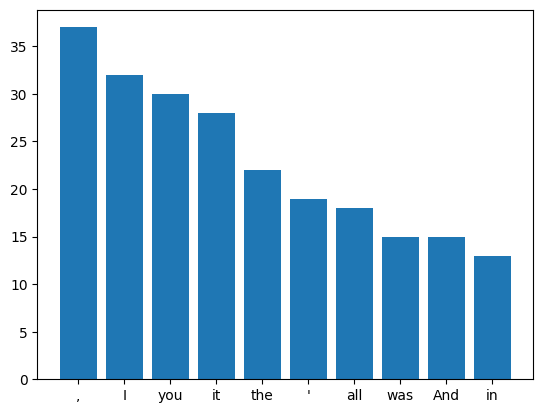

In [8]:
import nltk
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

tokens=word_tokenize(str_of_sentences)
print(tokens[100:150])

fdist = nltk.FreqDist(tokens) # frequency distribution of words
top_words = fdist.most_common(10)
plt.bar(
    [word[0] for word in top_words], # X-axis: words
    [count[1] for count in top_words]  # Y-axis: counts
)

#### SpaCy tokenizer

In [9]:
import spacy
from torchtext.data.utils import get_tokenizer

tokenizer = spacy.load("en_core_web_sm")
doc = tokenizer(text)
tokens = [token.text for token in doc]

tokenizer = get_tokenizer("spacy", language='en_core_web_sm')
tokens = tokenizer(str_of_sentences)

print(tokens[100:150])

['That', 'magic', "'s", 'not', 'here', 'no', 'more', '\n', 'And', 'I', 'might', 'be', 'okay', ',', 'but', 'I', "'m", 'not', 'fine', 'at', 'all', '\n', 'Oh', ',', 'oh', ',', 'oh', '\n\n', "'", 'Causе', 'there', 'we', 'arе', 'again', 'on', 'that', 'little', 'town', 'street', '\n', 'You', 'almost', 'ran', 'the', 'red', "'cause", 'you', 'were', 'lookin', "'"]


#### _basic_english_normalize() function

In [10]:
from torchtext.data.utils import get_tokenizer
tokenizer = get_tokenizer("basic_english")
tokens = tokenizer(str_of_sentences)
print(tokens[100:150])

['here', 'no', 'more', 'and', 'i', 'might', 'be', 'okay', ',', 'but', 'i', "'", 'm', 'not', 'fine', 'at', 'all', 'oh', ',', 'oh', ',', 'oh', "'", 'causе', 'there', 'we', 'arе', 'again', 'on', 'that', 'little', 'town', 'street', 'you', 'almost', 'ran', 'the', 'red', "'", 'cause', 'you', 'were', 'lookin', "'", 'over', 'at', 'me', 'wind', 'in', 'my']


### Subword-based tokenizer

#### WordPiece

In [11]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
tokens = tokenizer.tokenize(str_of_sentences)
print(tokens[100:150])

['magic', "'", 's', 'not', 'here', 'no', 'more', 'and', 'i', 'might', 'be', 'okay', ',', 'but', 'i', "'", 'm', 'not', 'fine', 'at', 'all', 'oh', ',', 'oh', ',', 'oh', "'", 'ca', '##us', '##е', 'there', 'we', 'ar', '##е', 'again', 'on', 'that', 'little', 'town', 'street', 'you', 'almost', 'ran', 'the', 'red', "'", 'cause', 'you', 'were', 'look']


#### Unigram and SentencePiece

In [12]:
from transformers import XLNetTokenizer
tokenizer = XLNetTokenizer.from_pretrained("xlnet-base-cased")
tokens = tokenizer.tokenize(str_of_sentences)
print(tokens[100:150])

['s', '▁long', '▁gone', '▁and', '▁That', '▁magic', "'", 's', '▁not', '▁here', '▁no', '▁more', '▁And', '▁I', '▁might', '▁be', '▁okay', ',', '▁but', '▁I', "'", 'm', '▁not', '▁fine', '▁at', '▁all', '▁Oh', ',', '▁oh', ',', '▁oh', '▁', "'", 'Ca', 'us', 'е', '▁there', '▁we', '▁', 'ar', 'е', '▁again', '▁on', '▁that', '▁little', '▁town', '▁street', '▁You', '▁almost', '▁ran']


### Clean up tokens

In [13]:
import string
import re

def preprocess(tokens):
    
    def strip_token(token):
        token = re.sub(r"[^\w\s]", '', token) # remove everything except letters and numbers
        token = re.sub(r"\d", '', token) # remove all digits
        token = re.sub(r"\s+", '', token) # Remove all whitespace characters (spaces, tabs, newlines)
        token = token.lower() # convert all to lowercase
        return token
    
    tokens = [strip_token(w) for w in tokens] # Apply preprocessing to each token (removes unwanted characters)
    
    # Convert tokens to lowercase and remove empty strings or punctuation
    return [w.lower() for w in tokens if len(w) != 0 and w not in string.punctuation]

# preprocess(tokens)

### Build vocabulary

In [14]:
from torchtext.vocab import build_vocab_from_iterator

""" Make tokenized iterator from data iterator """
tokenizer = get_tokenizer("basic_english")
def yield_tokens(data_iter):
    for _, text in data_iter:
        yield tokenizer(text.lower())  # Lowercase conversion for consistency
tokenized = yield_tokens(iter(ag_news_train))

""" Make tokenized iterator from string """
# Split string of sentences into list of words
# Then apply the tokenizer function to each word in the list
tokenizer = get_tokenizer("basic_english")
tokenized = preprocess(tokenizer(str_of_sentences))
tokenized_iter = map(tokenizer, tokenized)
        
""" Build vocabulary from tokenized iterator """
vocab = build_vocab_from_iterator(tokenized_iter, specials=["<unk>"])
vocab.set_default_index(vocab["<unk>"])

# Print the vocabulary size and sample tokens
print(f"Vocabulary size: {len(vocab)}")
print(f"Sample vocabulary: {list(vocab.get_stoi().values())[:10]}")
print(f"Sample tokens: {list(vocab.get_stoi().keys())[:10]}")

Vocabulary size: 293
Sample vocabulary: [291, 290, 292, 286, 284, 283, 281, 280, 279, 277]
Sample tokens: ['wondered', 'won', 'would', 'where', 'weepin', 'week', 'watch', 'want', 'walked', 'very']


## Collate functions and DataLoader

### Padding

In [15]:
from torch.utils.data import DataLoader
from torch.nn.utils.rnn import pad_sequence

""" Create a custom collate function for padding """
def collate_pad(batch):
    # Pad sequences within the batch to have equal lengths using pad_sequence
    # batch_first=True ensures that the tensors have shape (batch_size, max_sequence_length)
    padded_batch = pad_sequence(batch, batch_first=True)
    return padded_batch

# For already tokenized datasets that just need padding:
data_loader1 = DataLoader(dataset_tokenized, batch_size=2, collate_fn=collate_pad)

for batch in data_loader1:    
    print(batch)
    print("Length of sequences in the batch:",batch.shape[1])

tensor([[11, 19, 63, 17, 13,  2,  3, 47,  6, 16, 45,  0, 55,  3, 41, 46, 24, 10,
         43, 61,  9, 44,  0, 14,  9, 33,  1],
        [35,  6, 16,  3, 38, 40,  0,  8,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0]])
Length of sequences in the batch: 27
tensor([[12,  5, 15, 31,  0,  8,  0, 57, 53,  2, 18, 62,  4,  0, 36, 49, 56, 15,
         21,  1],
        [54, 18, 50, 23, 34, 58, 30, 27,  2,  5, 52,  7,  2,  5, 32,  1,  0,  0,
          0,  0]])
Length of sequences in the batch: 20
tensor([[66, 29, 14, 13, 10, 22, 60,  7, 37,  1, 28, 51, 48,  4, 42, 11, 59, 39,
          2, 12, 64, 17, 26, 65,  1],
        [19,  4, 25, 20,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0]])
Length of sequences in the batch: 25


### Padding & tokenization

In [16]:
from torch.utils.data import DataLoader
from torch.nn.utils.rnn import pad_sequence

""" Create a custom collate function for tokenization and padding """
def collate_tok_pad(batch): 
    tensor_batch = []
    for sample in batch: # Tokenize each sample in the batch using the specified tokenizer
        tokens = tokenizer(sample) 
        tensor_batch.append(torch.tensor([vocab[token] for token in tokens])) # Convert tokens to vocabulary indices and create a tensor for each sample

    # Pad sequences within the batch to have equal lengths using pad_sequence
    # batch_first=True ensures that the tensors have shape (batch_size, max_sequence_length)
    padded_batch = pad_sequence(tensor_batch, batch_first=True)
    return padded_batch

# If dataset is untokenized, it can be tokenized in the collate function of the DataLoader
data_loader2 = DataLoader(dataset, batch_size=2, collate_fn=collate_tok_pad)

for batch in data_loader2:    
    print(batch)
    print("Length of sequences in the batch:",batch.shape[1])

tensor([[165,   1, 280,  16,  41,  49,  13,   0,   0,  11,  19,   0,   0,  13,
           0,   0,  35,   0,  40,   0,   0,   0,   0,  44,   0,   0,   0],
        [  0,   0,  11,  13,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]])
Length of sequences in the batch: 27
tensor([[  3,   0,   0,   0,   0,   0,   0,  27, 242,  49,  12,   0,  34,   0,
           0, 193,   0,   0,   0,   0],
        [  0,  12,   0,   6,   0,   5,   0,   0,  49,   0,   0,   4,  49,   0,
           0,   0,   0,   0,   0,   0]])
Length of sequences in the batch: 20
tensor([[  0,  53,  44,  41,   0,  92,   0,   4,   0,   0,  18,  71,   0,  34,
           0, 165, 262, 146,  49,   3,   7,  16,  29,   0,   0],
        [  1,  34,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]])
Length of sequences in the batch: 25


## Helper Functions

### Train Model

In [162]:
from tqdm import tqdm

def train_model(model, dataloader, criterion, optimizer, num_epochs=1000, has_offsets = False, valid_dataloader = None, evaluate = None):
    
    train_metric = [] # List to store running loss for each epoch
    val_metric=[]

    for epoch in tqdm(range(1, num_epochs+1)): # Using tqdm for a progress bar
        
        model.train()
        cum_loss = 0.0 # Storing running loss values for the current epoch
        
        for idx, samples in enumerate(dataloader):

            optimizer.zero_grad()
            
            if has_offsets:
                target, text, offsets = samples
                predicted = model(text, offsets)
            
            else:
                target, text, *_ = samples
                predicted = model(text)
                      
            loss = criterion(predicted, target)
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), 0.1)
            optimizer.step()
            cum_loss += loss.item()
            
            # if idx%100 == 0:
            #     print(f'Batch {idx}')
            # if idx == 500:
            #     break

        train_metric.append(cum_loss)  # Append average loss for the epoch# Append average loss for the epoch
        
        if valid_dataloader is not None and evaluate is not None: 
            val_metric_ = evaluate(model, valid_dataloader)
            val_metric.append(val_metric_)
            # tqdm.write(f"Epoch {epoch}, Training Loss: {avg_loss:.4f}, Validation Accuracy: {accu_val:.4f}")
        # else:
            # tqdm.write(f"Epoch {epoch}, Training Loss: {avg_loss:.4f}")
            
    return model, train_metric, val_metric

### Plot Results

In [18]:
import matplotlib.pyplot as plt
def plot_results(TRAIN,VAL=None, ylim=None):
    fig, ax1 = plt.subplots()
    color = 'tab:red'
    ax1.plot(TRAIN, color=color)
    ax1.set_xlabel('epoch', color=color)
    ax1.set_ylabel('training metric', color=color)
    ax1.tick_params(axis='y', color=color)
    
    if ylim is not None:
        ax1.set_ylim(ylim)

    if VAL is not None:
        ax2 = ax1.twinx()
        color = 'tab:blue'
        ax2.set_ylabel('validation metric', color=color)  # you already handled the x-label with ax1
        ax2.plot(VAL, color=color)
        ax2.tick_params(axis='y', color=color)
        fig.tight_layout()  # otherwise the right y-label is slightly clipped

        if ylim is not None:
            ax2.set_ylim(ylim)
    plt.show()

## Embedding

### Evaluate embedding

#### Plot word embeddings in a 2D space (with dimensionality reduction)

In [19]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def plot_embeddings(word_embeddings,vocab=vocab):

    tsne = TSNE(n_components=2, random_state=0)
    word_embeddings_2d = tsne.fit_transform(word_embeddings)

    # Plotting the results with labels from vocab
    plt.figure(figsize=(15, 15))
    for i, word in enumerate(vocab.get_itos() ):  # assuming vocab.itos gives the list of words in your vocab
        plt.scatter(word_embeddings_2d[i, 0], word_embeddings_2d[i, 1])
        plt.annotate(word, (word_embeddings_2d[i, 0], word_embeddings_2d[i, 1]))
        if i>200:
            break

    plt.xlabel("t-SNE component 1")
    plt.ylabel("t-SNE component 2")
    plt.title("Word Embeddings visualized with t-SNE")
    plt.show()

#### Find similar words

In [20]:
# This function returns the most similar words to a target word by calculating word vectors' cosine distance
def find_similar_words(word, word_embeddings, vocab, top_k=5):
    
    index_to_token = vocab.get_itos()
    target_idx = vocab[word]
    # Get the embedding for the given word
    target_embedding = word_embeddings[target_idx]

    # Calculate cosine similarities between the target word and all other words
    similarities = {}
    for idx, embedding in enumerate(word_embeddings):
        if idx != target_idx:
            similarity = torch.dot(target_embedding, embedding) / (
                torch.norm(target_embedding) * torch.norm(embedding)
            )
            similarities[index_to_token[idx]] = similarity.item()

    # Sort the similarities in descending order
    sorted_similarities = sorted(similarities.items(), key=lambda x: x[1], reverse=True)

    # Return the top k similar words
    most_similar_words = [w for w, _ in sorted_similarities[:top_k]]
    return most_similar_words

### Untrained embedding layers

- vocab size: number of unique words in the vocabulary
- embedding dimension: size of vector that each word / bag of words will be represented with

In [21]:
from torch import nn

vocab_size = len(vocab)
embedding_dim = 100

# maps word indices to dense vector representations
nn.Embedding(vocab_size, embedding_dim)

# Bag of words (designed for scenarios where the order of elements within a sequence is less important)
nn.EmbeddingBag(vocab_size, embedding_dim, sparse=False)

EmbeddingBag(293, 100, mode='mean')

### Word2vec model (built from scratch)

Word2Vec uses shallow, two-layer neural networks to learn word embeddings. The key idea is that words that appear in similar contexts tend to have vectors that are close to each other in this vector space. This closeness is measured by metrics like cosine similarity.

#### Build vocab

In [22]:
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Step 1: Get tokenizer
tokenizer = get_tokenizer('basic_english')

# Step 2: Tokenize sentences
tokenized = preprocess(tokenizer(str_of_sentences))
tokenized_iter = map(tokenizer, tokenized)

# Step 3: Build vocabulary
vocab = build_vocab_from_iterator(tokenized_iter, specials=["<unk>"])
vocab.set_default_index(vocab["<unk>"])

#### Create context and target pairs

In [23]:
CONTEXT_SIZE = 3

def text_pipeline(text):
    if isinstance(text, list):
        return [vocab[x] for x in text]
    elif isinstance(text, str):
        return [vocab[text]]

def context_target_Word2Vec(tokens):

    data = []
    # Loop through the list of words, ensuring enough previous words exist for context
    for i in range(CONTEXT_SIZE, len(tokens) - CONTEXT_SIZE):

        # Add target word to the target list
        target = tokens[i]

        # Extract the context words
        context = (
            [tokens[i - CONTEXT_SIZE + j] for j in range(CONTEXT_SIZE)]
            + [tokens[i + j + 1] for j in range(CONTEXT_SIZE)]
        )   
        
        data.append((context, target))
    return data

In [24]:
data_Word2Vec = context_target_Word2Vec(tokenized)

In [25]:
data_CBOW = data_Word2Vec
data_CBOW[0:5]

[(['i', 'walked', 'through', 'door', 'with', 'you'], 'the'),
 (['walked', 'through', 'the', 'with', 'you', 'the'], 'door'),
 (['through', 'the', 'door', 'you', 'the', 'air'], 'with'),
 (['the', 'door', 'with', 'the', 'air', 'was'], 'you'),
 (['door', 'with', 'you', 'air', 'was', 'cold'], 'the')]

In [26]:
# Create a new entry for each context word and its target
data_skip = [[(sample[1],word) for word in  sample[0]] for sample in data_Word2Vec]
# Flatten the list
data_skip = [item for items in data_skip for item in items]
data_skip[0:5]

[('the', 'i'),
 ('the', 'walked'),
 ('the', 'through'),
 ('the', 'door'),
 ('the', 'with')]

#### Collate functions

In [27]:
def collate_batch_context_target_pairs(batch):
    context, target, offsets = [], [], [0]
    
    for _context, _target in batch:     
        target.append(text_pipeline(_target)[0])  
        processed_context = torch.tensor(text_pipeline(_context), dtype=torch.int64)
        context.append(processed_context)
        offsets.append(processed_context.shape[0])
        
    target = torch.tensor(target, dtype=torch.int64)
    offsets = torch.tensor(offsets[:-1]).cumsum(dim=0)
    context = torch.cat(context)
    
    # Move tensors to the appropriate device (CPU/GPU)
    return target.to(device), context.to(device), offsets.to(device)

print('CBOW:')
print(collate_batch_context_target_pairs(data_CBOW[0:5]))

print('\nSkip-gram:')
print(collate_batch_context_target_pairs(data_skip[0:5]))

CBOW:
(tensor([ 5, 58, 51,  1,  5]), tensor([  2, 279, 266,  58,  51,   1, 279, 266,   5,  51,   1,   5, 266,   5,
         58,   1,   5,  93,   5,  58,  51,   5,  93,   7,  58,  51,   1,  93,
          7, 121]), tensor([ 0,  6, 12, 18, 24]))

Skip-gram:
(tensor([  2, 279, 266,  58,  51]), tensor([5, 5, 5, 5, 5]), tensor([0, 1, 2, 3, 4]))


In [28]:
def collate_batch_token_list(batch, skipgram=False):
        
    data = context_target_Word2Vec(batch)
    if skipgram:
        data = [[([sample[1]],word) for word in  sample[0]] for sample in data]
        data = [item for items in data for item in items]

    # Convert list of context & target pairs to PyTorch tensors
    context = torch.cat([torch.tensor(text_pipeline(item[0]), dtype=torch.int64) for item in data])
    target = torch.tensor([text_pipeline(item[1])[0] for item in data], dtype=torch.int64)    
    offsets = [0] + [len(item[0]) for item in data]
    offsets = torch.tensor(offsets[:-1]).cumsum(dim=0)
                      
    # Move tensors to the appropriate device (CPU/GPU)
    return target.to(device), context.to(device), offsets.to(device)

print('CBOW:')
print(collate_batch_token_list(tokenized[0:5+2*CONTEXT_SIZE],skipgram = False))

print('\nSkip-gram:')
print(collate_batch_token_list(tokenized[0:7], skipgram = True))

CBOW:
(tensor([ 5, 58, 51,  1,  5]), tensor([  2, 279, 266,  58,  51,   1, 279, 266,   5,  51,   1,   5, 266,   5,
         58,   1,   5,  93,   5,  58,  51,   5,  93,   7,  58,  51,   1,  93,
          7, 121]), tensor([ 0,  6, 12, 18, 24]))

Skip-gram:
(tensor([  2, 279, 266,  58,  51,   1]), tensor([5, 5, 5, 5, 5, 5]), tensor([0, 1, 2, 3, 4, 5]))


#### DataLoader

In [29]:
from torch.utils.data import DataLoader
from functools import partial

BATCH_SIZE = 15  # batch size for training

Padding=BATCH_SIZE-len(tokenized)%BATCH_SIZE
tokenized_pad=tokenized+tokenized[0:Padding]

dataloader_CBOW_1 = DataLoader(data_Word2Vec, batch_size=BATCH_SIZE, shuffle=False, 
                             collate_fn=collate_batch_context_target_pairs)
# print(next(iter(dataloader_CBOW_1)))

dataloader_CBOW_2 = DataLoader(tokenized_pad, batch_size=BATCH_SIZE, shuffle=False, 
                             collate_fn=collate_batch_token_list)
# print(f'\n{next(iter(dataloader_CBOW_2))}')

dataloader_skip_1 = DataLoader(data_skip, batch_size=BATCH_SIZE, shuffle=False, 
                             collate_fn=collate_batch_context_target_pairs)
# print(f'\n{next(iter(dataloader_skip_1))}')

collate_fn = partial(collate_batch_token_list, skipgram=True)
dataloader_skip_2 = DataLoader(tokenized_pad, batch_size=BATCH_SIZE, shuffle=False, 
                             collate_fn=collate_fn)
# print(f'\n{next(iter(dataloader_skip_2))}')

#### CBOW model

In [30]:
from torch import nn

class CBOW(nn.Module):
    # Initialize the CBOW model
    def __init__(self, vocab_size, embed_dim):
        
        super(CBOW, self).__init__()
         # Define the embedding layer using nn.EmbeddingBag
        # It outputs the average of context words embeddings
        self.embedding = nn.EmbeddingBag(vocab_size, embed_dim, sparse=False)
        # Define the first linear layer with input size embed_dim and output size embed_dim//2
        self.linear1 = nn.Linear(embed_dim, embed_dim//2)
        # Define the fully connected layer with input size embed_dim//2 and output size vocab_size
        self.fc = nn.Linear(embed_dim//2, vocab_size)
        
        self.init_weights()
        
    # Initialize the weights of the model's parameters
    def init_weights(self):
        # Initialize the weights of the embedding layer
        initrange = 0.5
        self.embedding.weight.data.uniform_(-initrange, initrange)
        # Initialize the weights of the fully connected layer
        self.fc.weight.data.uniform_(-initrange, initrange)
        # Initialize the biases of the fully connected layer to zeros
        self.fc.bias.data.zero_()
        

    def forward(self, text, offsets):
        # Pass the input text and offsets through the embedding layer
        out = self.embedding(text, offsets)
        # Apply the ReLU activation function to the output of the first linear layer
        out = torch.relu(self.linear1(out))
        # Pass the output of the ReLU activation through the fully connected layer
        return self.fc(out)
    
vocab_size = len(vocab)
embedding_size = 24
model_CBOW = CBOW(vocab_size, embedding_size).to(device)

#### Skip-gram model

In [31]:
class SkipGram(nn.Module):

    def __init__(self, vocab_size, embed_dim):
        super(SkipGram, self).__init__()
        # Define the embeddings layer
        self.embeddings = nn.Embedding(
            num_embeddings=vocab_size,
            embedding_dim=embed_dim
        )
        
        # Define the fully connected layer
        self.fc = nn.Linear(in_features=embed_dim, out_features=vocab_size)

    def forward(self, text):
        # Perform the forward pass
        # Pass the input text through the embeddings layer
        out = self.embeddings(text)
        
        # Pass the output of the embeddings layer through the fully connected layer
        # Apply the ReLU activation function
        out = torch.relu(out)
        out = self.fc(out)
        
        return out
    
vocab_size = len(vocab)
embedding_size = 24
model_skipgram = SkipGram(vocab_size, embedding_size).to(device)

#### Train the models

In [32]:
LR = 5
EPOCHS = 400

dataloader = dataloader_CBOW_1
offsets = True

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_CBOW.parameters(), lr=LR)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 1.0, gamma=0.1)
    
model_CBOW,loss_list_CBOW, _  = train_model(model_CBOW, dataloader, criterion, optimizer, num_epochs=EPOCHS, has_offsets = offsets)

100%|█████████████████████████████████████████| 400/400 [00:08<00:00, 46.15it/s]


Continuous Bag of Words:


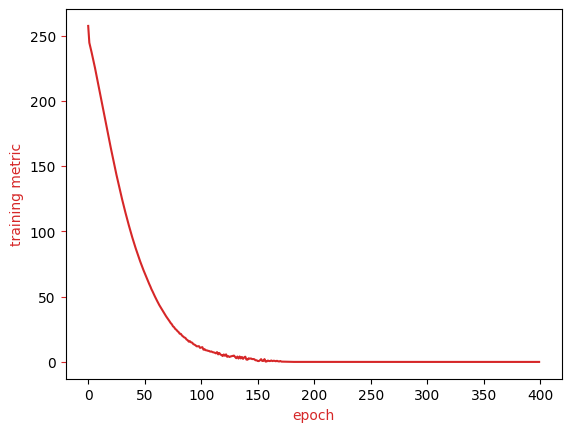

In [33]:
print('Continuous Bag of Words:')
plot_results(loss_list_CBOW)

In [34]:
LR = 5
EPOCHS = 400

dataloader = dataloader_skip_1
offsets = False

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_skipgram.parameters(), lr=LR)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 1.0, gamma=0.1)

model_skipgram,loss_list_skip, _  = train_model(model_skipgram, dataloader, criterion, optimizer, num_epochs=EPOCHS, has_offsets = offsets)

100%|█████████████████████████████████████████| 400/400 [01:08<00:00,  5.86it/s]


Skip-gram:


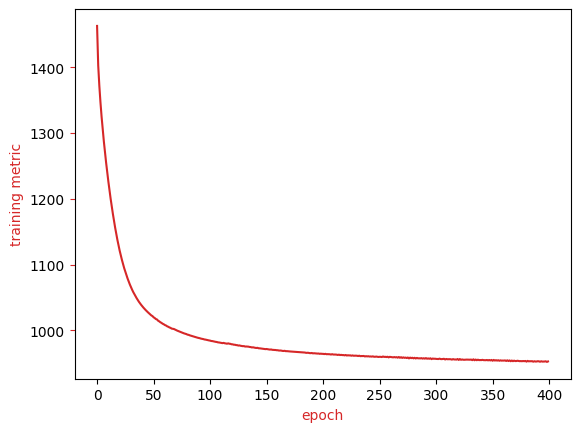

In [35]:
print('Skip-gram:')
plot_results(loss_list_skip)

#### Use pre-trained embedding

In [36]:
word_embeddings_CBOW = model_CBOW.embedding.weight.detach()
word_embeddings_skip = model_skipgram.embeddings.weight.detach()

embeddings = nn.Embedding.from_pretrained(word_embeddings_CBOW,freeze=True)

#### Evaluate embedding

Similar words to shame: ['forget', 'got', 'rare', 'plaid', 'thinkin']


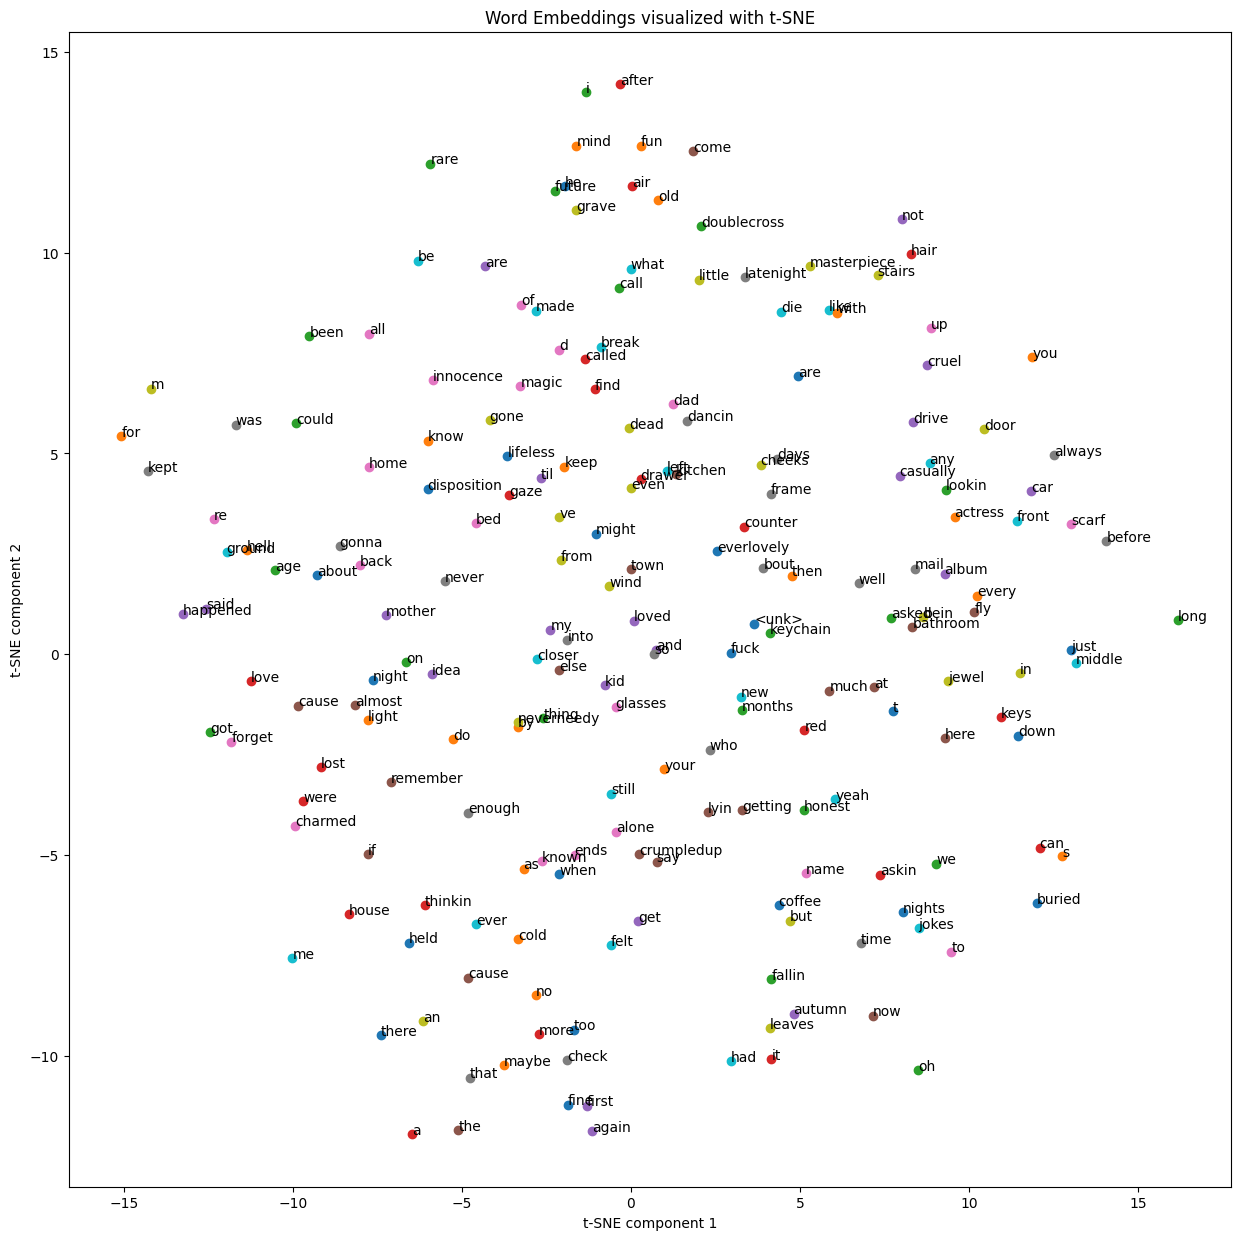

In [37]:
# Finding similar words
word = "shame"
print(f'Similar words to {word}: {find_similar_words(word, word_embeddings_CBOW, vocab, top_k=5)}')

plot_embeddings(word_embeddings_CBOW,vocab=vocab)

Similar words to nobody: ['shirt', 'these', 'know', 'willin', 'when']


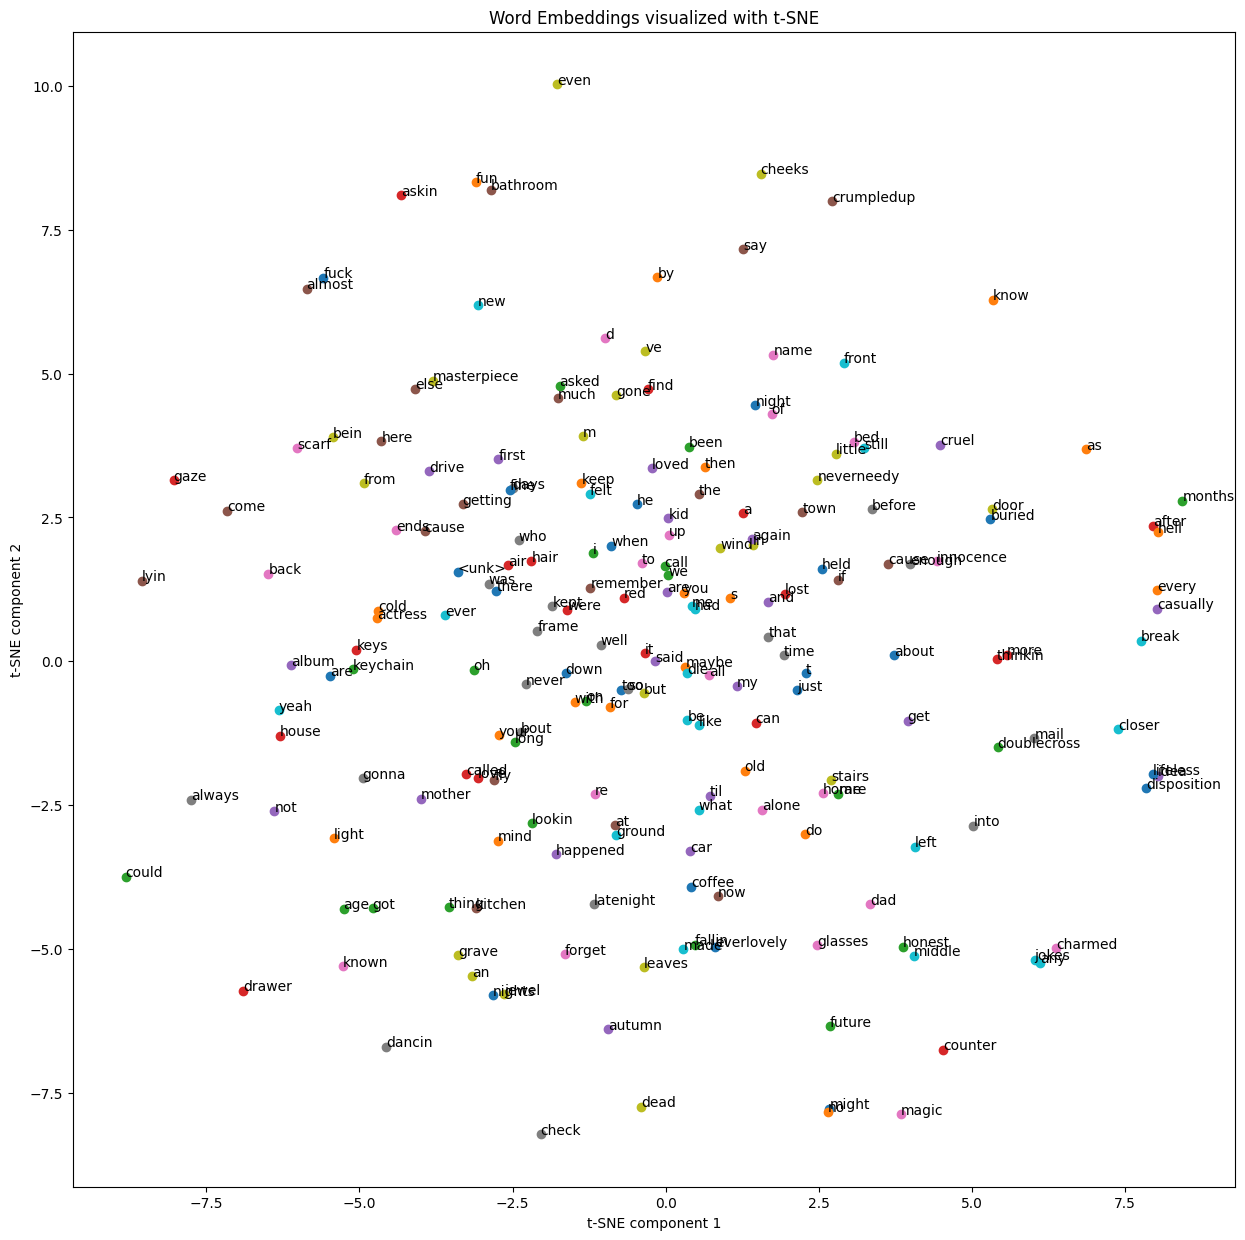

In [38]:
# Finding similar words
word = "nobody"
print(f'Similar words to {word}: {find_similar_words(word, word_embeddings_skip, vocab, top_k=5)}')

plot_embeddings(word_embeddings_skip,vocab=vocab)

### Gensim Word2Vec Model

Similar words to 'air': [('i', 0.8540653586387634), ('cause', 0.8531922698020935), ('you', 0.8509231805801392), ('and', 0.8502801060676575), ('were', 0.8501340746879578), ('in', 0.8492991328239441), ('but', 0.8492292761802673), ('remember', 0.8478708863258362), ('it', 0.8477974534034729), ('a', 0.8474379777908325)]

Similarity between 'cold' and 'air': 0.68168783


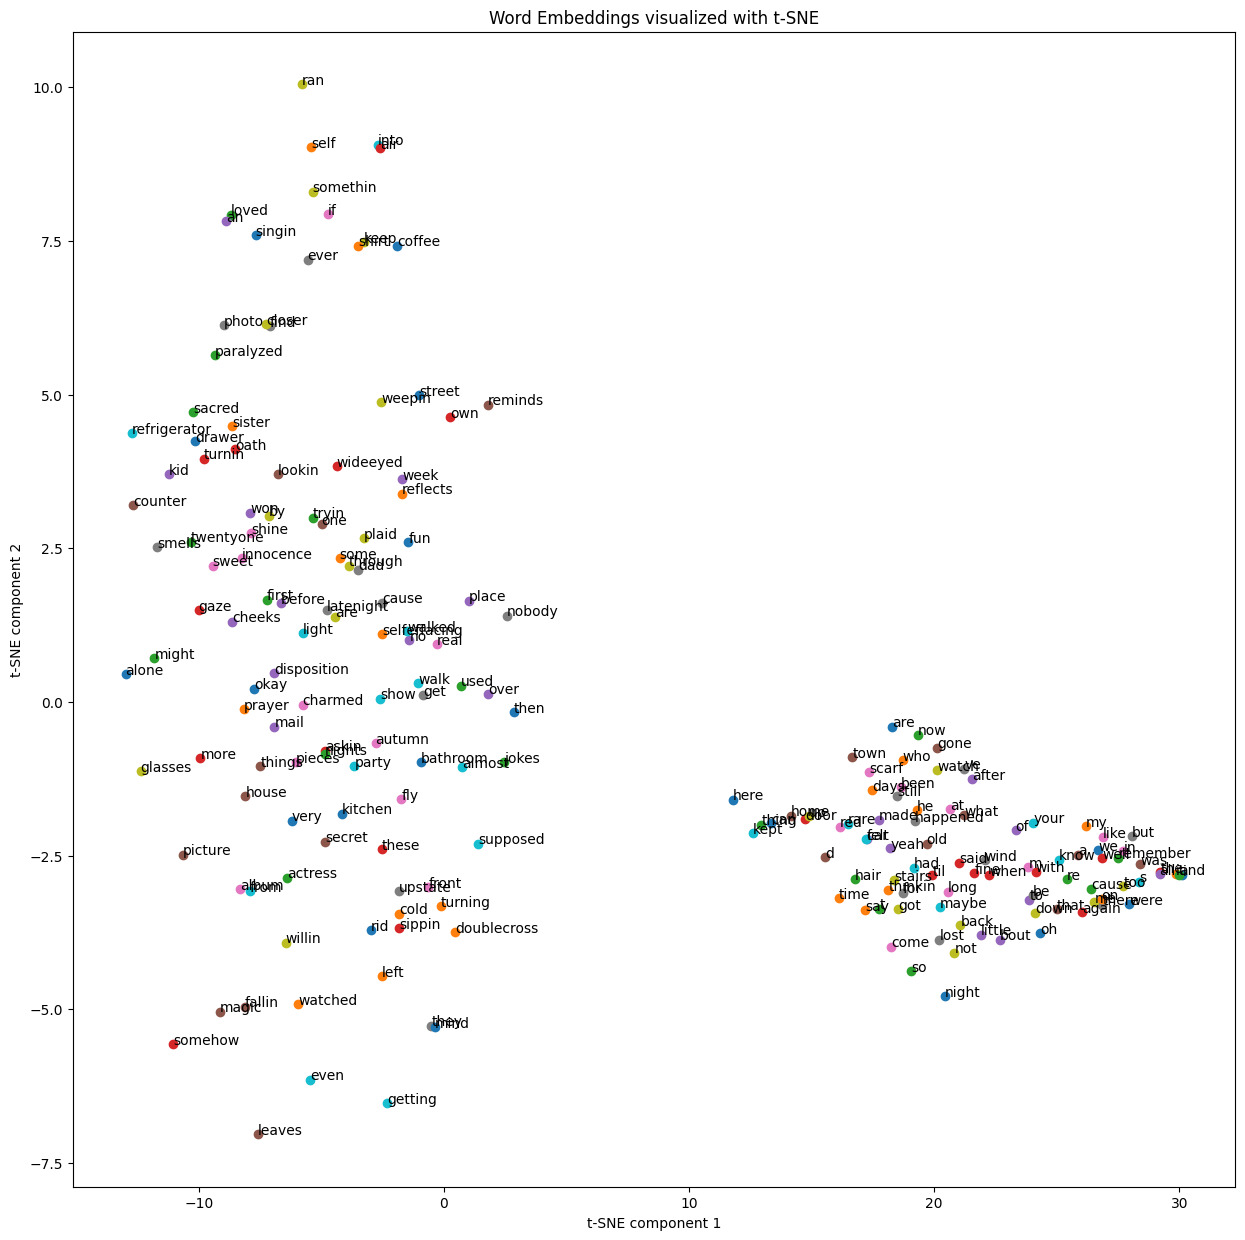

In [39]:
from gensim.models import Word2Vec
import torchtext

""" Define and train the embedding """

context_size = 3
embedding_size = 100 

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Get tokenizer
tokenizer = get_tokenizer('basic_english')

# Tokenize sentences
tokenized = preprocess(tokenizer(str_of_sentences))

# Create an instance of Word2Vec model
w2v_model = Word2Vec([tokenized], vector_size=embedding_size, window=context_size, min_count=1, workers=4)

# Build vocab using the training data
w2v_model.build_vocab([tokenized], progress_per=10000)

# Train the model on your training data
w2v_model.train([tokenized], total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

""" Use pre-trained embedding """

# Extract word vectors and create word-to-index mapping
word_vectors = w2v_model.wv.vectors
vocab_dict = {word: index for index, word in enumerate(w2v_model.wv.index_to_key)}
vocab = torchtext.vocab.vocab(vocab_dict)

# Create an instance of nn.Embedding and load it with the trained vectors
embedding_dim = w2v_model.vector_size
embedding = torch.nn.Embedding(len(vocab_dict), embedding_dim)
embedding.weight.data.copy_(torch.from_numpy(word_vectors))


""" Evaluate embedding """

# Finding similar words
similar_words = w2v_model.wv.most_similar("air")
print("Similar words to 'air':", similar_words)

# Calculating word similarity
similarity = w2v_model.wv.similarity("cold", "air")
print("\nSimilarity between 'cold' and 'air':", similarity)

plot_embeddings(word_vectors,vocab=vocab)

### Pre-trained embedding models

In [40]:
from torch import nn
from torchtext.vocab import GloVe,vocab

# you can specify the model with the following format: GloVe(name='840B', dim=300)
glove_vectors_6B = GloVe(name ='6B') 

embeddings = nn.Embedding.from_pretrained(glove_vectors_6B.vectors,freeze=True)

word_to_index = glove_vectors_6B.stoi  # Vocabulary index mapping
index = word_to_index['team']
vector = embeddings.weight[index]

# vocab = vocab(glove_vectors_6B.stoi, 0,specials=('<unk>', '<pad>'))
# vocab.set_default_index(vocab["<unk>"])

## Positional Encoding

In [41]:
from torch import nn
from torch import Tensor

class PositionalEncoding(nn.Module):
    
    """ Produces vectors with unique values for each position in a sequence, which are added to the embeddings"""

    def __init__(self, emb_size: int, max_seq_len: int = 5000, dropout: float = 0.1):
        super(PositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(p=dropout)

        position = torch.arange(0, max_seq_len, dtype=torch.float).unsqueeze(1)
        den = torch.exp(
            -torch.arange(0, emb_size, 2).float()
            * (math.log(10000.0) / emb_size)
        )
        pos_embedding = torch.zeros(max_seq_len, emb_size)
        pos_embedding[:, 0::2] = torch.sin(position * den)
        pos_embedding[:, 1::2] = torch.cos(position * den)        
        pos_embedding = pos_embedding.unsqueeze(-2)
        
        self.register_buffer("pos_embedding", pos_embedding)

    def forward(self, token_embedding: Tensor):
        x = token_embedding + self.pos_embedding[:token_embedding.size(0), :]
        return self.dropout(x)

## Models

### Text classification

#### Prepare the data

In [42]:
from torch.utils.data.dataset import random_split

# Determine the number of samples to be used for training and validation (5% for validation).
num_train = int(len(ag_news_train_dataset) * 0.85)

# Randomly split the training dat aset into training and validation datasets using `random_split`.
# The training dataset will contain 95% of the samples, and the validation dataset will contain the remaining 5%.
split_train_, split_valid_ = random_split(ag_news_train_dataset, [num_train, len(ag_news_train_dataset) - num_train])

# If using pre-trained embedding, use the vocab from the embedding model
vocab = torchtext.vocab.vocab(glove_vectors_6B.stoi, 0, specials=('<unk>',))
vocab.set_default_index(vocab["<unk>"]) 

# Add an embedding for the '<unk>' token - we will just use the average of all other embedding vectors
average_row = torch.mean(glove_vectors_6B.vectors, dim=0, keepdim=True)
embedding_vectors = torch.cat((average_row, glove_vectors_6B.vectors), dim=0)

#### Collate function and DataLoader

In [43]:
def text_pipeline(x):
    x=x.lower()
    return vocab(tokenizer(x))

def label_pipeline(x):
    return int(x) - 1

# create label, text and offset for each batch of data
# text is the concatenated text for all text data in the batch
# you need to have the offsets(the end of text index) for later when you separate texts and predict their label
def collate_batch(batch):
    label_list, text_list, offsets = [], [], [0]
    for _label, _text in batch:
        label_list.append(label_pipeline(_label))
        processed_text = torch.tensor(text_pipeline(_text), dtype=torch.int64)
        text_list.append(processed_text)
        offsets.append(processed_text.size(0))

    label_list = torch.tensor(label_list, dtype=torch.int64)
    offsets = torch.tensor(offsets).cumsum(dim=0)
    text_list = torch.cat(text_list)
    return label_list.to(device), text_list.to(device), offsets.to(device)

In [44]:
BATCH_SIZE = 64

train_dataloader = DataLoader(split_train_, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_batch)
valid_dataloader = DataLoader(split_valid_, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_batch)
test_dataloader = DataLoader(ag_news_test, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_batch)

#### Define the model

In [45]:
from torch import nn

class TextClassification(nn.Module):
    def __init__(self, vocab_size, embed_dim, num_class):
        super(TextClassification, self).__init__()
        
        """ With pre-trained embedding: """
        self.embedding = nn.Embedding.from_pretrained(embedding_vectors,freeze=True)
        """ Without pre-trained embedding: """
        # self.embedding = nn.EmbeddingBag(vocab_size, embed_dim, sparse=False)
        
        self.fc = nn.Linear(embed_dim, num_class)
        self.init_weights()

    def init_weights(self):
        initrange = 0.5
        # self.embedding.weight.data.uniform_(-initrange, initrange)
        self.fc.weight.data.uniform_(-initrange, initrange)
        self.fc.bias.data.zero_()

    def forward(self, text, offsets):
        
        """ With pre-trained embedding: """
        embedded = self.embedding(text)
        # you get the average of word embeddings in the text
        means = []
        for i in range(1,len(offsets)):
            text_tmp = embedded[offsets[i-1]:offsets[i]]
            means.append(text_tmp.mean(0))
        embedded = torch.stack(means)
        
        """ Without pre-trained embedding: """
        # embedded = self.embedding(text, offsets)
        
        return self.fc(embedded)

vocab_size = len(vocab)
embedding_dim = 300 
num_class = len(set([label for (label, text) in ag_news_train_dataset ]))
model = TextClassification(vocab_size, embedding_dim, num_class)

#### Train the model

In [46]:
def evaluate(model, dataloader):
    model.eval()
    total_acc, total_count= 0, 0

    with torch.no_grad(): # we don't need to evaluate gradients during evaluation, saves memory and computation time
        for idx, (label, text, offsets) in enumerate(dataloader):
            predicted_label = model(text,offsets)

            total_acc += (predicted_label.argmax(1) == label).sum().item()
            total_count += label.size(0)
    return total_acc / total_count

In [47]:
LR=0.1
EPOCHS = 10

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LR)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 1.0, gamma=0.1)
    
model,loss_list,acc_epoch  = train_model(model,
                                         train_dataloader,
                                         criterion,
                                         optimizer,
                                         num_epochs=EPOCHS, 
                                         valid_dataloader = valid_dataloader,
                                         evaluate = evaluate,
                                         has_offsets = True)

100%|███████████████████████████████████████████| 10/10 [01:19<00:00,  7.94s/it]


#### Evaluate

##### Training loss and validation accuracy

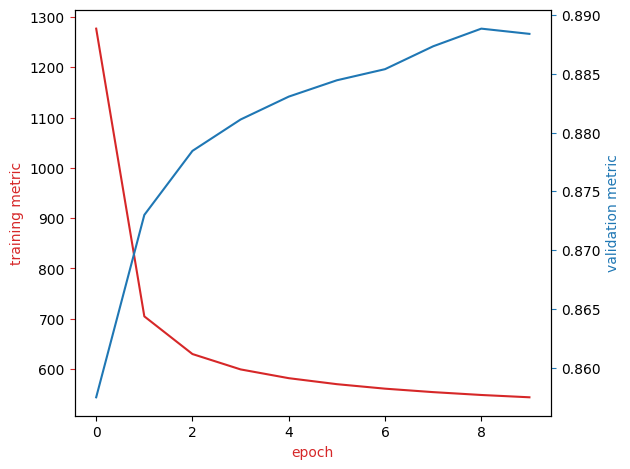

In [48]:
plot_results(loss_list,acc_epoch)

##### Test accuracy

In [49]:
evaluate(model, test_dataloader)

0.8864473684210527

##### Visualise word embeddings

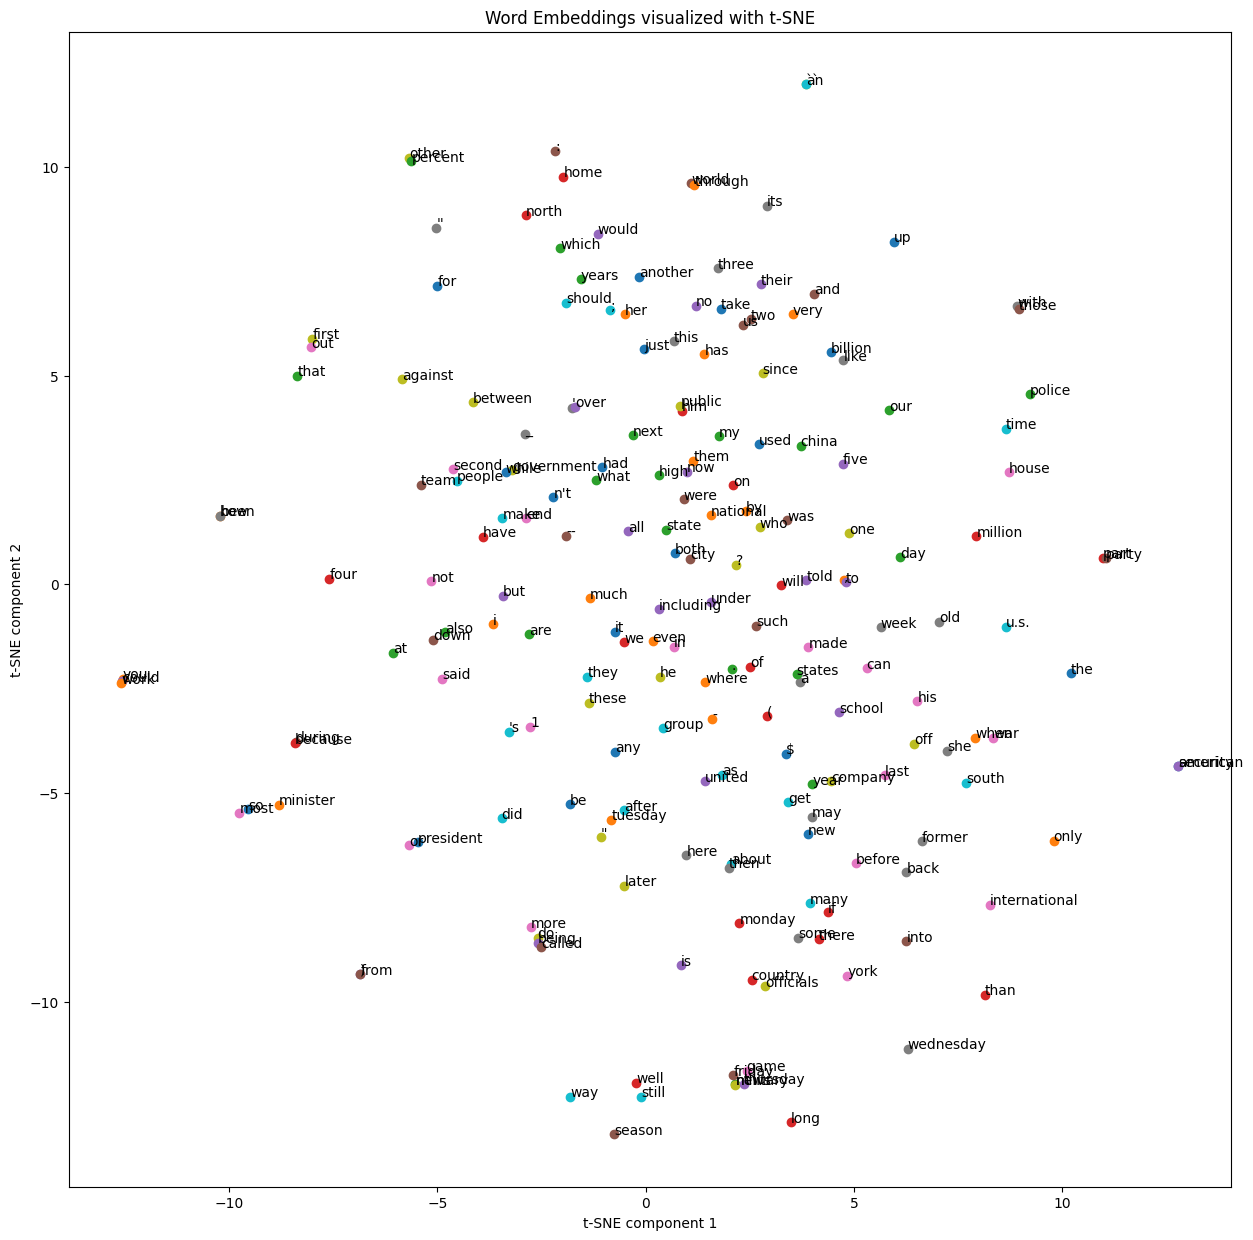

In [50]:
import torchtext
from collections import Counter
import random

word_embeddings = model.embedding.weight.detach()

random_keys = vocab.get_itos()[0:200]
index = [vocab[k] for k in random_keys]
embedding_subset = word_embeddings[index]
dict_subset = {key: i for i, key in enumerate(random_keys)}
vocab_subset = torchtext.vocab.vocab(dict_subset)

plot_embeddings(embedding_subset,vocab_subset)

##### Make predictions with the trained model

In [51]:
def predict(text, text_pipeline):
    with torch.no_grad():
        text = torch.tensor(text_pipeline(text))
        output = model(text, torch.tensor([0, len(text)]))
        return ag_news_label[output.argmax(1).item()+1]
    
article="""In a stunning upset, the underdog team won the national title, beating the favorites in a match that featured an incredible comeback and a last-minute goal that sealed their victory in front of a record crowd."""

prediction = predict(article, text_pipeline)
print(f"The article is classified as: {prediction}\n")

The article is classified as: Sports



### N-Grams

#### Prepare the data

In [52]:
from torchtext.data.utils import get_tokenizer
from nltk.tokenize import word_tokenize as tokenizer

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Step 2: Tokenize sentences
tokenized = preprocess(tokenizer(str_of_sentences))
tokenized_iter = map(tokenizer, tokenized)

# Step 3: Build vocabulary
vocab = build_vocab_from_iterator(tokenized_iter, specials=["<unk>"])
vocab.set_default_index(vocab["<unk>"])

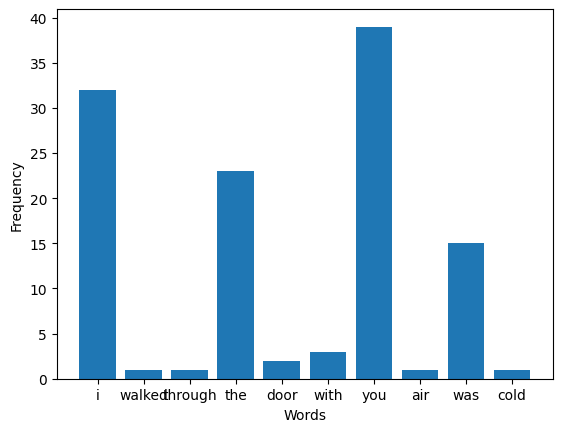

In [53]:
fdist = nltk.FreqDist(tokenized)
plt.bar(list(fdist.keys())[0:10],list(fdist.values())[0:10])
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()

#### Create context and target pairs

In [54]:
CONTEXT_SIZE = 6

def text_pipeline(text):
    if isinstance(text, list):
        return [vocab[x] for x in text]
    elif isinstance(text, str):
        return [vocab[text]]

def context_target_ngram(tokens):

    data = []
    # Loop through the list of words, ensuring enough previous words exist for context
    for i in range(CONTEXT_SIZE, len(tokens) - CONTEXT_SIZE):

        # Add target word to the target list
        target = tokens[i]

        # Extract the context words
        context = (
            [tokens[i - j - 1] for j in range(CONTEXT_SIZE)]
        )   
        
        data.append((context, target))
    return data

In [55]:
data_ngrams = context_target_ngram(tokenized)

In [56]:
data_ngrams[0:5]

[(['with', 'door', 'the', 'through', 'walked', 'i'], 'you'),
 (['you', 'with', 'door', 'the', 'through', 'walked'], 'the'),
 (['the', 'you', 'with', 'door', 'the', 'through'], 'air'),
 (['air', 'the', 'you', 'with', 'door', 'the'], 'was'),
 (['was', 'air', 'the', 'you', 'with', 'door'], 'cold')]

#### Collate function

In [57]:
def collate_batch_context_target_pairs(batch):
    context, target = [], []
    
    for _context, _target in batch:     
        target.append(text_pipeline(_target)[0])  
        context.append(text_pipeline(_context))
        
    target = torch.tensor(target, dtype=torch.int64)
    context = torch.tensor(context, dtype=torch.int64)
    
    # Move tensors to the appropriate device (CPU/GPU)
    return target.to(device), context.to(device)

print('N-Gram:')
print(collate_batch_context_target_pairs(data_ngrams[0:5]))

N-Gram:
(tensor([  1,   5,  92,   7, 122]), tensor([[ 51,  57,   5, 268, 281,   2],
        [  1,  51,  57,   5, 268, 281],
        [  5,   1,  51,  57,   5, 268],
        [ 92,   5,   1,  51,  57,   5],
        [  7,  92,   5,   1,  51,  57]]))


In [58]:
def collate_batch_token_list(batch):
        
    data = context_target_ngram(batch)

    # Convert list of context & target pairs to PyTorch tensors
    context = torch.tensor([text_pipeline(item[0]) for item in data], dtype=torch.int64)
    target = torch.tensor([text_pipeline(item[1])[0] for item in data], dtype=torch.int64)    
                      
    # Move tensors to the appropriate device (CPU/GPU)
    return target.to(device), context.to(device)

print('N-Gram:')
print(collate_batch_token_list(tokenized[0:5+2*CONTEXT_SIZE]))

N-Gram:
(tensor([  1,   5,  92,   7, 122]), tensor([[ 51,  57,   5, 268, 281,   2],
        [  1,  51,  57,   5, 268, 281],
        [  5,   1,  51,  57,   5, 268],
        [ 92,   5,   1,  51,  57,   5],
        [  7,  92,   5,   1,  51,  57]]))


#### DataLoader

In [59]:
from torch.utils.data import DataLoader
from functools import partial

BATCH_SIZE = 64  # batch size for training

Padding=BATCH_SIZE-len(tokenized)%BATCH_SIZE
tokenized_pad=tokenized+tokenized[0:Padding]

dataloader_ngram_1 = DataLoader(data_ngrams, batch_size=BATCH_SIZE, shuffle=False, 
                             collate_fn=collate_batch_context_target_pairs)
print(next(iter(dataloader_ngram_1)))

dataloader_ngram_2 = DataLoader(tokenized_pad, batch_size=BATCH_SIZE, shuffle=False, 
                             collate_fn=collate_batch_token_list)
print(f'\n{next(iter(dataloader_ngram_2))}')

(tensor([  1,   5,  92,   7, 122,  18, 252,  37,   3,  58,  19,  65, 251,   4,
          2, 180,  14,  76,  10,  35,  21, 247,  11, 164,   4,   1,  48,  79,
         61,   3,   8,  21, 134, 139,  45,  32,  21, 258, 131,   4,  14, 290,
        154,  12,  46, 245,   8,   5,  53, 156,  43, 277, 103, 179, 143,  30,
         19, 219, 168, 220,   4,   2, 114, 217]), tensor([[ 51,  57,   5, 268, 281,   2],
        [  1,  51,  57,   5, 268, 281],
        [  5,   1,  51,  57,   5, 268],
        [ 92,   5,   1,  51,  57,   5],
        [  7,  92,   5,   1,  51,  57],
        [122,   7,  92,   5,   1,  51],
        [ 18, 122,   7,  92,   5,   1],
        [252,  18, 122,   7,  92,   5],
        [ 37, 252,  18, 122,   7,  92],
        [  3,  37, 252,  18, 122,   7],
        [ 58,   3,  37, 252,  18, 122],
        [ 19,  58,   3,  37, 252,  18],
        [ 65,  19,  58,   3,  37, 252],
        [251,  65,  19,  58,   3,  37],
        [  4, 251,  65,  19,  58,   3],
        [  2,   4, 251,  65,  19,  58

#### Define the model

In [60]:
class NGram(nn.Module):
    
    def __init__(self, vocab_size, embedding_dim, context_size):
        super(NGram, self).__init__()

        # Store context size and embedding dimension
        self.context_size = context_size
        self.embedding_dim = embedding_dim

        # Embedding layer: Maps word indices to dense vectors
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)

        # Fully connected hidden layer: Maps the concatenated embeddings to a 128-dimensional space
        self.linear1 = nn.Linear(context_size * embedding_dim, 128)

        # Output layer: Maps the hidden layer output to vocabulary size (probability distribution over words)
        self.linear2 = nn.Linear(128, vocab_size)

    def forward(self, inputs):

        # Convert input word indices into dense vectors using the embedding layer
        embeds = self.embeddings(inputs)  # Shape: (batch_size, context_size, embedding_dim)

        # Reshape the embeddings into a single vector per input sample
        embeds = torch.reshape(embeds, (embeds.shape[0], -1))

        # New shape: (batch_size, context_size * embedding_dim)
        # Apply first fully connected layer with ReLU activation
        out = nn.functional.relu(self.linear1(embeds))  # Shape: (batch_size, 128)

        # Apply second fully connected layer to generate vocabulary-size logits
        out = self.linear2(out)  # Shape: (batch_size, vocab_size)

        return out
      
vocab_size = len(vocab)
embedding_size = 24
model = NGram(vocab_size, embedding_size, context_size = CONTEXT_SIZE).to(device)

#### Train the model

In [61]:
EPOCHS = 10000

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1.0, gamma=0.1)
    
model, loss_list, _  = train_model(model,
                                dataloader_ngram_2,
                                criterion,
                                optimizer,
                                num_epochs=EPOCHS,
                                has_offsets=False)

100%|█████████████████████████████████████| 10000/10000 [01:56<00:00, 85.98it/s]


#### Evaluate

##### Training loss

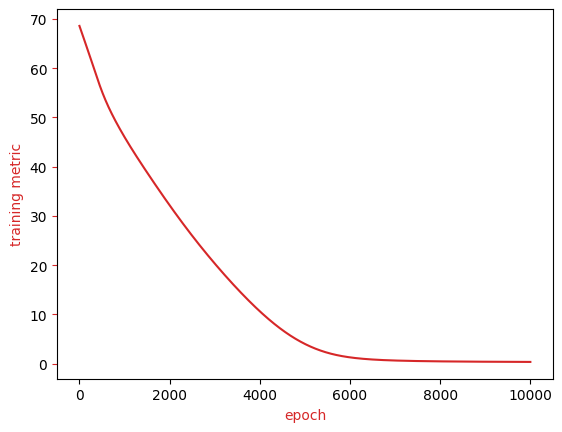

In [62]:
plot_results(loss_list)

##### Evaluate word embeddings

Similar words to shame: ['shirt', 'who', 'stairs', 'drawer', 'picture']


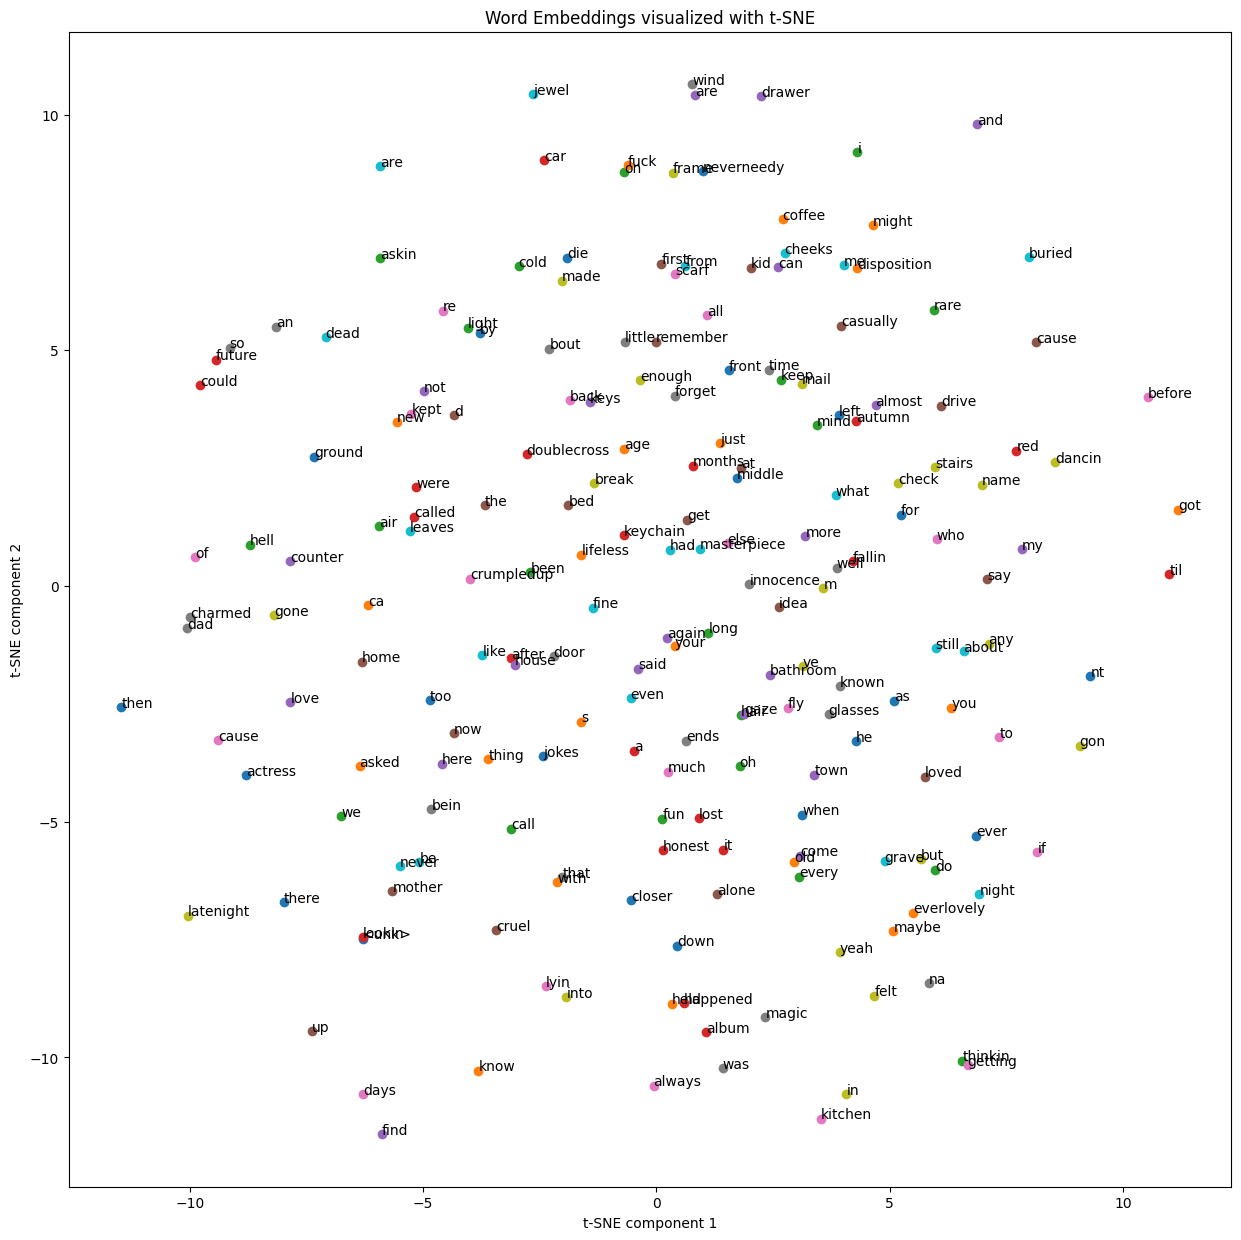

In [63]:
word_embeddings = model.embeddings.weight.detach()

# Finding similar words
word = "shame"
print(f'Similar words to {word}: {find_similar_words(word, word_embeddings_CBOW, vocab, top_k=5)}')

plot_embeddings(word_embeddings,vocab=vocab)

##### Generate song with the train model

In [64]:
def write_song(model, my_song, number_of_words=100):

    # Get the mapping from index to word for decoding predictions
    index_to_token = vocab.get_itos()

    # Loop to generate the desired number of words
    for i in range(number_of_words):

        with torch.no_grad():  # Disable gradient computation for inference
            
            # Prepare the input context by extracting the last CONTEXT_SIZE words from tokens
            context = torch.tensor(
                vocab([my_song[- j - 1] for j in range(CONTEXT_SIZE)])
            ).to(device)  # Move to CPU/GPU as required
            # Predict the next word by selecting the word with the highest probability
            word_idx = torch.argmax(model(context.view(1,-1)))  # Get index of the most likely next word
            
            # Append the predicted word to the generated text
            my_song.append(index_to_token[word_idx.detach().item()])
            # print(my_song)
    return my_song 

song=write_song(model, tokenized[0:10])
print(' '.join(song))

i walked through the door with you the air was cold but somethin bout it felt like home somehow and i left my scarf there at your sister s house and you ve still got it in your drawer even now oh your sweet disposition and my wideeyed gaze we re singin in the car getting lost upstate your he s in my it to come i know in a but hell every time you doublecross my mind you said if we had been closer in age maybe it would ve been fine and that made me want to die the idea you had of me who was she a


### Sequence-to-sequence RNN models

Sequence-to-sequence (seq2seq) models employ Recurrent Neural Networks (RNNs) to process variable-length input sequences and generate variable-length output sequences. RNNs have a recurrent connection that allows information to flow from one step to the next. Thus, they maintain an internal memory ($h_t$) to capture information from previous steps.

**Applications:**

- Translation
- Question answering (e.g., chatbots)
- Summarization

In [65]:
SEED = 1234
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

#### Prepare the data

In [66]:
from torchtext.vocab import build_vocab_from_iterator
from torchtext.data.utils import get_tokenizer
from typing import Iterable, List

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

""" Make tokenized iterator from data iterator """

tokenizer = {}
tokenizer[SRC_LANGUAGE] = get_tokenizer('spacy', language='de_core_news_sm')
tokenizer[TGT_LANGUAGE] = get_tokenizer('spacy', language='en_core_web_sm')

def yield_tokens(data_iter: Iterable, language: str) -> List[str]:
    # Define a mapping to associate the source and target languages
    # with their respective positions in the data samples.
    language_index = {SRC_LANGUAGE: 0, TGT_LANGUAGE: 1}

    # Iterate over each data sample in the provided dataset iterator
    for data_sample in data_iter:
        # Tokenize the data sample corresponding to the specified language
        # and yield the resulting tokens.
        yield tokenizer[language](data_sample[language_index[language]])
        

""" Build vocabulary from tokenized iterator """

# Define special symbols and indices
UNK_IDX, PAD_IDX, BOS_IDX, EOS_IDX = 0, 1, 2, 3
# Make sure the tokens are in order of their indices to properly insert them in vocab
special_symbols = ['<unk>', '<pad>', '<bos>', '<eos>']

vocab = {}
for ln in [SRC_LANGUAGE, TGT_LANGUAGE]:
    # Create torchtext's Vocab object
    vocab[ln] = build_vocab_from_iterator(yield_tokens(multi30k_sorted_train, ln),
                                                    min_freq=1,
                                                    specials=special_symbols,
                                                    special_first=True)
    vocab[ln].set_default_index(UNK_IDX)

    # Print the vocabulary size and sample tokens
    print(f"{ln} vocabulary size: {len(vocab[ln])}")
    print(f"{ln} sample vocabulary: {list(vocab[ln].get_stoi().values())[:10]}")
    print(f"{ln} sample tokens: {list(vocab[ln].get_stoi().keys())[:10]}\n")

de vocabulary size: 19214
de sample vocabulary: [19213, 19212, 19211, 19209, 19208, 19200, 19199, 19198, 19192, 19188]
de sample tokens: ['’s', '’', 'ürde', 'üppigem', 'übrigen', 'übertriebene', 'überstehendes', 'überspringt', 'überrascht', 'überlisten']

en vocabulary size: 10837
en sample vocabulary: [10835, 10834, 10833, 10832, 10829, 10827, 10826, 10825, 10824, 10820]
en sample tokens: ['zoom', 'zips', 'zippered', 'youngster', 'yellowed', 'yawns', 'yawing', 'yak', 'yacht', 'writhing']



#### Collate function and DataLoader

In [67]:
from torch.nn.utils.rnn import pad_sequence

# function to add BOS/EOS, flip source sentence and create tensor for input sequence indices
def add_BOS_EOS_flip(token_ids: List[int]):
    return torch.cat((torch.tensor([BOS_IDX]),
                      torch.flip(torch.tensor(token_ids), dims=(0,)),
                      torch.tensor([EOS_IDX])))

# function to add BOS/EOS and create tensor for input sequence indices
def add_BOS_EOS(token_ids: List[int]):
    return torch.cat((torch.tensor([BOS_IDX]),
                      torch.tensor(token_ids),
                      torch.tensor([EOS_IDX])))

# helper function to club together sequential operations
def sequential_transforms(*transforms):
    def func(txt_input):
        for transform in transforms:
            txt_input = transform(txt_input)
        return txt_input
    return func

# ``src`` and ``tgt`` language text pipeline to convert raw strings into tensors indices
text_pipeline = {}

text_pipeline[SRC_LANGUAGE] = sequential_transforms(tokenizer[SRC_LANGUAGE], #Tokenization
                                            vocab[SRC_LANGUAGE], #Numericalization
                                            add_BOS_EOS) # Add BOS/EOS & and create tensor

text_pipeline[TGT_LANGUAGE] = sequential_transforms(tokenizer[TGT_LANGUAGE], #Tokenization
                                            vocab[TGT_LANGUAGE], #Numericalization
                                            add_BOS_EOS) # Add BOS/EOS and create tensor

# function to collate data samples into batch tensors
def collate_fn(batch):
    src_batch, tgt_batch = [], []
    for src_sample, tgt_sample in batch:
        src_sequences = text_pipeline[SRC_LANGUAGE](src_sample.rstrip("\n"))
        src_sequences = torch.tensor(src_sequences, dtype=torch.int64)
        tgt_sequences = text_pipeline[TGT_LANGUAGE](tgt_sample.rstrip("\n"))
        tgt_sequences = torch.tensor(tgt_sequences, dtype=torch.int64)
        src_batch.append(src_sequences)
        tgt_batch.append(tgt_sequences)

    src_batch = pad_sequence(src_batch, padding_value=PAD_IDX,batch_first=True)
    tgt_batch = pad_sequence(tgt_batch, padding_value=PAD_IDX,batch_first=True)
    src_batch = src_batch.t()
    tgt_batch = tgt_batch.t()
    
    return src_batch.to(device), tgt_batch.to(device)

In [68]:
from torch.utils.data import DataLoader

BATCH_SIZE = 4

train_dataloader = DataLoader(multi30k_sorted_train, batch_size=BATCH_SIZE, collate_fn=collate_fn,drop_last=True)
valid_dataloader = DataLoader(multi30k_sorted_valid, batch_size=BATCH_SIZE, collate_fn=collate_fn,drop_last=True)

src, trg = next(iter(train_dataloader))
src,trg

/var/folders/yg/fs0jpct14dqgsbwd5_hk8t740000gn/T/ipykernel_67602/1347705794.py:39: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  src_sequences = torch.tensor(src_sequences, dtype=torch.int64)
/var/folders/yg/fs0jpct14dqgsbwd5_hk8t740000gn/T/ipykernel_67602/1347705794.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tgt_sequences = torch.tensor(tgt_sequences, dtype=torch.int64)


(tensor([[    2,     2,     2,     2],
         [    3,  5510,  5510, 12642],
         [    1,     3,     3,     8],
         [    1,     1,     1,  1701],
         [    1,     1,     1,     3]]),
 tensor([[   2,    2,    2,    2],
         [   3, 6650,  216,    6],
         [   1, 4623,  110, 3398],
         [   1,  259, 3913,  202],
         [   1,  172, 1650,  109],
         [   1, 9953, 3823,   37],
         [   1,  115,   71,    3],
         [   1,  692, 2808,    1],
         [   1, 3428, 2187,    1],
         [   1,    5,    5,    1],
         [   1,    3,    3,    1]]))

#### Define the model

In [69]:
from torch import nn

##### Encoder

In [70]:
class Encoder(nn.Module):
    def __init__(self, vocab_len, emb_dim, hid_dim, n_layers, dropout_prob):
        super().__init__()

        self.hid_dim = hid_dim
        self.n_layers = n_layers

        self.embedding = nn.Embedding(vocab_len, emb_dim)

        self.lstm = nn.LSTM(emb_dim, hid_dim, n_layers, dropout = dropout_prob)
        self.dropout = nn.Dropout(dropout_prob)

    def forward(self, input_batch):
        
        embed = self.dropout(self.embedding(input_batch)) #input_batch = [src len, batch size]
        embed = embed.to(device)
        
        #outputs = [src len, batch size, hid dim * n directions]
        #hidden = [n layers * n directions, batch size, hid dim]
        #cell = [n layers * n directions, batch size, hid dim]
        outputs, (hidden, cell) = self.lstm(embed)

        return hidden, cell

##### Decoder

In [71]:
class Decoder(nn.Module):
    def __init__(self, output_dim, emb_dim, hid_dim, n_layers, dropout):
        super().__init__()

        self.output_dim = output_dim
        self.hid_dim = hid_dim
        self.n_layers = n_layers


        self.embedding = nn.Embedding(output_dim, emb_dim)
        self.lstm = nn.LSTM(emb_dim, hid_dim, n_layers, dropout = dropout)
        self.fc_out = nn.Linear(hid_dim, output_dim)
        self.softmax = nn.LogSoftmax(dim=1)
        self.dropout = nn.Dropout(dropout)

    def forward(self, input, hidden, cell):


        #input = [batch size]

        #hidden = [n layers * n directions, batch size, hid dim]
        #cell = [n layers * n directions, batch size, hid dim]

        #n directions in the decoder will both always be 1, therefore:
        #hidden = [n layers, batch size, hid dim]
        #context = [n layers, batch size, hid dim]

        input = input.unsqueeze(0)
        #input = [1, batch size]

        embedded = self.dropout(self.embedding(input))
        #embedded = [1, batch size, emb dim]

        output, (hidden, cell) = self.lstm(embedded, (hidden, cell))
        #output = [seq len, batch size, hid dim * n directions]
        #hidden = [n layers * n directions, batch size, hid dim]
        #cell = [n layers * n directions, batch size, hid dim]

        #seq len and n directions will always be 1 in the decoder, therefore:
        #output = [1, batch size, hid dim]
        #hidden = [n layers, batch size, hid dim]
        #cell = [n layers, batch size, hid dim]
        prediction_logit = self.fc_out(output.squeeze(0))
        prediction = self.softmax(prediction_logit)
        #prediction = [batch size, output dim]


        return prediction, hidden, cell
    

##### Sequence-to-sequence (encoder + decoder)

In [72]:
import random

class Seq2Seq(nn.Module):
    def __init__(self, encoder, decoder, device,trg_vocab):
        super().__init__()

        self.encoder = encoder
        self.decoder = decoder
        self.device = device
        self.trg_vocab = trg_vocab
        
        self.init_weights()

        assert encoder.hid_dim == decoder.hid_dim, \
            "Hidden dimensions of encoder and decoder must be equal!"
        assert encoder.n_layers == decoder.n_layers, \
            "Encoder and decoder must have equal number of layers!"
        
    def init_weights(m):
        for name, param in m.named_parameters():
                nn.init.uniform_(param.data, -0.08, 0.08)

    def forward(self, src, trg, teacher_forcing_ratio = 0.5):
        #src = [src len, batch size]
        #trg = [trg len, batch size]
        #teacher_forcing_ratio is probability to use teacher forcing
        #e.g. if teacher_forcing_ratio is 0.75 you use ground-truth inputs 75% of the time


        batch_size = trg.shape[1]
        trg_len = trg.shape[0]
        trg_vocab_size = self.decoder.output_dim

        #tensor to store decoder outputs
        outputs = torch.zeros(trg_len, batch_size, trg_vocab_size).to(self.device)

        #last hidden state of the encoder is used as the initial hidden state of the decoder
        hidden, cell = self.encoder(src)
        hidden = hidden.to(device)
        cell = cell.to(device)


        #first input to the decoder is the <bos> tokens
        input = trg[0,:]

        for t in range(1, trg_len):

            #insert input token embedding, previous hidden and previous cell states
            #receive output tensor (predictions) and new hidden and cell states
            output, hidden, cell = self.decoder(input, hidden, cell)

            #place predictions in a tensor holding predictions for each token
            outputs[t] = output

            #decide if you are going to use teacher forcing or not
            teacher_force = random.random() < teacher_forcing_ratio

            #get the highest predicted token from your predictions
            top1 = output.argmax(1)


            #if teacher forcing, use actual next token as next input
            #if not, use predicted token
            #input = trg[t] if teacher_force else top1
            input = trg[t] if teacher_force else top1


        return outputs

In [73]:
from torchinfo import summary

INPUT_DIM = len(vocab[SRC_LANGUAGE])
OUTPUT_DIM = len(vocab[TGT_LANGUAGE])
ENC_EMB_DIM = 128 #256
DEC_EMB_DIM = 128 #256
HID_DIM = 256 #512
N_LAYERS = 1 #2
ENC_DROPOUT = 0.3 #0.5
DEC_DROPOUT = 0.3 #0.5

enc = Encoder(INPUT_DIM, ENC_EMB_DIM, HID_DIM, N_LAYERS, ENC_DROPOUT)
dec = Decoder(OUTPUT_DIM, DEC_EMB_DIM, HID_DIM, N_LAYERS, DEC_DROPOUT)

model = Seq2Seq(enc, dec, device,trg_vocab = vocab[TGT_LANGUAGE]).to(device)

summary(model, input_size=[(5, 2), (3, 2)], dtypes=[torch.long, torch.long]) # Provide an example input shape

/Users/isabelle/.local/lib/python3.12/site-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.3 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Layer (type:depth-idx)                   Output Shape              Param #
Seq2Seq                                  [3, 2, 10837]             --
├─Encoder: 1-1                           [1, 2, 256]               --
│    └─Embedding: 2-1                    [5, 2, 128]               2,459,392
│    └─Dropout: 2-2                      [5, 2, 128]               --
│    └─LSTM: 2-3                         [5, 2, 256]               395,264
├─Decoder: 1-2                           [2, 10837]                --
│    └─Embedding: 2-4                    [1, 2, 128]               1,387,136
│    └─Dropout: 2-5                      [1, 2, 128]               --
│    └─LSTM: 2-6                         [1, 2, 256]               395,264
│    └─Linear: 2-7                       [2, 10837]                2,785,109
│    └─LogSoftmax: 2-8                   [2, 10837]                --
├─Decoder: 1-3                           [2, 10837]                (recursive)
│    └─Embedding: 2-9                    [1, 

#### Train the model

In [74]:
def evaluate(model, dataloader, criterion):

    model.eval()

    cum_loss = 0

    # Wrap iterator with tqdm for progress logging
    valid_iterator = tqdm(iterator, desc="Training", leave=False)

    with torch.no_grad(): # we don't need to evaluate gradients during evaluation, saves memory and computation time

        for i, (src,trg) in enumerate(dataloader):

            src = src.to(device)
            trg = trg.to(device)

            output = model(src, trg, 0) #turn off teacher forcing

            output_dim = output.shape[-1]
            output = output[1:].view(-1, output_dim)
            trg = trg[1:].contiguous().view(-1)
            
            #trg = [(trg len - 1) * batch size]
            #output = [(trg len - 1) * batch size, output dim]

            loss = criterion(output, trg)
            
            # Update tqdm progress bar with the current loss
            valid_iterator.set_postfix(loss=loss.item())

            cum_loss += loss.item()

    return cum_loss / len(list(dataloader))

In [75]:
from tqdm import tqdm

def train_seq2seq(model, train_dataloader, criterion, optimizer, num_epochs = 3, clip = 1, valid_dataloader = None, evaluate = None):

    train_losses = [] # training losses
    valid_losses = [] # validation losses

    train_PPLs = [] # training perplexities
    valid_PPLs = [] # validation perplexities

    for epoch in range(1, num_epochs+1):

        model.train()
        cum_loss = 0 # Storing running loss values for the current epoch

        # Wrap iterator with tqdm for progress logging
        train_iterator = tqdm(train_dataloader, desc="Training", leave=False)

        for idx, (src,trg) in enumerate(train_dataloader):

            optimizer.zero_grad()

            output = model(src, trg)

            output_dim = output.shape[-1]
            output = output[1:].view(-1, output_dim)
            trg = trg[1:].contiguous().view(-1)

            #trg = [(trg len - 1) * batch size]
            #output = [(trg len - 1) * batch size, output dim]

            loss = criterion(output, trg)
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), clip) # clip the gradients to prevent them from becoming too large during backpropagation

            optimizer.step()

            # Update tqdm progress bar with the current loss
            train_iterator.set_postfix(loss=loss.item())

            cum_loss += loss.item()
        
        train_losses.append(train_loss)
        train_PPLs.append(math.exp(train_loss))
        
        if valid_dataloader is not None and evaluate is not None:
            valid_loss = evaluate(model, valid_dataloader, criterion)
            valid_losses.append(valid_loss)
            valid_PPLs.append(math.exp(valid_loss))

        print(f'Epoch: {epoch:02}')
        print(f'\tTrain Loss: {train_loss:.3f} | Train PPL: {train_ppl:7.3f}')
        print(f'\t Val. Loss: {valid_loss:.3f} |  Val. PPL: {valid_ppl:7.3f}')

        return model, train_losses, train_PPLs, valid_losses, valid_PPLs

In [ ]:
EPOCHS = 10

criterion = torch.nn.CrossEntropyLoss(ignore_index = PAD_IDX)
optimizer = torch.optim.Adam(model.parameters())
    
model,train_losses, train_PPLs, valid_losses, valid_PPLs  = train_seq2seq(model, 
              train_dataloader,
              criterion,
              optimizer,
              num_epochs=EPOCHS,
              clip = 1,
              valid_dataloader = valid_dataloader,
              evaluate = evaluate)

#### Evaluate

In [77]:
model.load_state_dict(torch.load('saved_models/RNN-TR-model.pt',map_location=torch.device('cpu')))

<All keys matched successfully>

##### Generate translations with the trained model

In [78]:
import torch.nn.functional as F

#generates translations for input source sentences
def generate_translation(model, src_sentence, src_vocab, trg_vocab, max_len=50):
    model.eval()  # Set the model to evaluation mode

    with torch.no_grad():
        src_tensor = text_pipeline[SRC_LANGUAGE](src_sentence).view(-1, 1).to(device)

        # Pass the source tensor through the encoder
        hidden, cell = model.encoder(src_tensor)

        # Create a tensor to store the generated translation
        # get_stoi() maps tokens to indices
        trg_indexes = [trg_vocab.get_stoi()['<bos>']]  # Start with <bos> token

        # Convert the initial token to a PyTorch tensor
        trg_tensor = torch.LongTensor(trg_indexes).unsqueeze(1)  # Add batch dimension

        # Move the tensor to the same device as the model
        trg_tensor = trg_tensor.to(model.device)

        # Generate the translation
        for _ in range(max_len):

            # Pass the target tensor and the previous hidden and cell states through the decoder
            output, hidden, cell = model.decoder(trg_tensor[-1], hidden, cell)

            # Get the predicted next token
            pred_token = output.argmax(1)[-1].item()

            # Append the predicted token to the translation
            trg_indexes.append(pred_token)

            # If the predicted token is the <eos> token, stop generating
            if pred_token == trg_vocab.get_stoi()['<eos>']:
                break

            # Convert the predicted token to a PyTorch tensor
            trg_tensor = torch.LongTensor(trg_indexes).unsqueeze(1)  # Add batch dimension

            # Move the tensor to the same device as the model
            trg_tensor = trg_tensor.to(model.device)

        # Convert the generated tokens to text
        # get_itos() maps indices to tokens
        trg_tokens = [trg_vocab.get_itos()[i] for i in trg_indexes]

        # Remove the <bos> and <eos> from the translation
        if trg_tokens[0] == '<bos>':
            trg_tokens = trg_tokens[1:]
        if trg_tokens[-1] == '<eos>':
            trg_tokens = trg_tokens[:-1]

        # Return the translation list as a string

        translation = " ".join(trg_tokens)

        return translation

In [79]:
# Actual translation: Asian man is sweeping the walkway.
src_sentence = 'Ein asiatischer Mann kehrt den Gehweg.'

generated_translation = generate_translation(model, src_sentence=src_sentence, src_vocab=vocab['de'], trg_vocab=vocab['en'], max_len=12)

print(generated_translation)

An Asian man is on the sidewalk .


##### BLEU score

While perplexity (used to validate model during training) serves as a general metric to evaluate the performance of language model in predicting the correct next token, BLEU score is helpful in evaluating the quality of the final generated translation.

In [80]:
from nltk.translate.bleu_score import sentence_bleu

def calculate_bleu_score(generated_translation, reference_translations):
    # Convert the generated translations and reference translations into the expected format for sentence_bleu
    references = [reference.split() for reference in reference_translations]
    hypothesis = generated_translation.split()

    # Calculate the BLEU score
    bleu_score = sentence_bleu(references, hypothesis)

    return bleu_score

In [81]:
reference_translations = [
    "Asian man sweeping the walkway .",
    "An asian man sweeping the walkway .",
    "An Asian man sweeps the sidewalk .",
    "An Asian man is sweeping the sidewalk .",
    "An asian man is sweeping the walkway .",
    "Asian man sweeping the sidewalk ."
]

bleu_score = calculate_bleu_score(generated_translation, reference_translations)
print("BLEU Score:", bleu_score)

BLEU Score: 0.5


## Transformer models

### Transformers for text classification (AG News)

#### Prepare the data

In [82]:
from torch.utils.data.dataset import random_split

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

train = AG_NEWS(split="train")
ag_news_train_iter = iter(train)

""" Make tokenized iterator from data iterator """
tokenizer = get_tokenizer("basic_english")
def yield_tokens(data_iter):
    for _, text in data_iter:
        yield tokenizer(text.lower())  # Lowercase conversion for consistency
tokenized_iter = yield_tokens(ag_news_train_iter)

""" Build vocabulary from tokenized iterator """
vocab = build_vocab_from_iterator(tokenized_iter, specials=["<unk>"])
vocab.set_default_index(vocab["<unk>"])

""" Split dataset into training and validation """
# Determine the number of samples to be used for training and validation (5% for validation).
num_train = int(len(ag_news_train_dataset) * 0.95)

# Randomly split the training dat aset into training and validation datasets using `random_split`.
# The training dataset will contain 95% of the samples, and the validation dataset will contain the remaining 5%.
split_train_, split_valid_ = random_split(ag_news_train_dataset, [num_train, len(ag_news_train_dataset) - num_train])


#### Collate function and DataLoader

In [83]:
from torch.nn.utils.rnn import pad_sequence

def text_pipeline(x):
    x=x.lower()
    return vocab(tokenizer(x))

def label_pipeline(x):
    return int(x) - 1

def collate_batch(batch):
    label_list, text_list = [], []
    for _label, _text in batch:
        label_list.append(label_pipeline(_label))
        text_list.append(torch.tensor(text_pipeline(_text), dtype=torch.int64))

    label_list = torch.tensor(label_list, dtype=torch.int64)
    text_list = pad_sequence(text_list, batch_first=True)

    return label_list.to(device), text_list.to(device)

In [84]:
BATCH_SIZE = 64

train_dataloader = DataLoader(split_train_, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_batch)
valid_dataloader = DataLoader(split_valid_, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_batch)
test_dataloader = DataLoader(ag_news_test, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_batch)

#### Define the model

In [106]:
from torch import nn

class PositionalEncoding(nn.Module):
    
    """ Produces vectors with unique values for each position in a sequence, which are added to the embeddings"""

    def __init__(self, emb_size: int, vocab_size: int = 5000, dropout: float = 0.1):
        super().__init__()
        self.dropout = nn.Dropout(p=dropout)

        pos_embedding = torch.zeros(vocab_size, emb_size)
        position = torch.arange(0, vocab_size, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(
            torch.arange(0, emb_size, 2).float()
            * (-math.log(10000.0) / emb_size)
        )
        pos_embedding[:, 0::2] = torch.sin(position * div_term)
        pos_embedding[:, 1::2] = torch.cos(position * div_term)
        pos_embedding = pos_embedding.unsqueeze(0)
        self.register_buffer("pe", pos_embedding)

    def forward(self, token_embedding):
        x = token_embedding + self.pe[:, :token_embedding.size(1),  :]
        return self.dropout(x)

In [107]:
class Transformer_TextClassifier(nn.Module):
    
    def __init__(self, vocab_size, num_class, embedding_dim=100, nhead=5, dim_feedforward=2048, num_layers=6, 
                 dropout=0.1, activation="relu", classifier_dropout=0.1):

        super().__init__()

        self.emb = nn.Embedding(vocab_size,embedding_dim)

        self.pos_encoder = PositionalEncoding(
            emb_size=embedding_dim,
            dropout=dropout,
            vocab_size=vocab_size,
          )

        encoder_layer = nn.TransformerEncoderLayer(
            d_model=embedding_dim, #dimensionality of the model's input and output features
            nhead=nhead, #number of attention heads in the multi-head self-attention mechanism
            dim_feedforward=dim_feedforward, #dimensionality of the feedforward neural network used within the Transformer layer for processing the attention output
            dropout=dropout, #dropout ratio for regularisation
        )
        self.transformer_encoder = nn.TransformerEncoder(
            encoder_layer,
            num_layers=num_layers, #number of encoder layers to stack on top of each other
        )
        
        self.classifier = nn.Linear(embedding_dim, num_class)
        self.d_model = embedding_dim

    def forward(self, x):
        x = self.emb(x) * math.sqrt(self.d_model) # Apply the model's embedding layer and scale the embeddings by sqrt(d_model)
        x = self.pos_encoder(x)
        x = self.transformer_encoder(x)
        x = x.mean(dim=1)
        x = self.classifier(x)

        return x

In [108]:
from torchinfo import summary

vocab_size = len(vocab)
embedding_dim = 64 
num_class = len(set([label for (label, text) in ag_news_train_dataset]))
model = Transformer_TextClassifier(vocab_size=vocab_size,num_class=4).to(device)

summary(model, input_size=[(BATCH_SIZE, 10)], dtypes=[torch.long, torch.long]) # Provide an example input shape

Layer (type:depth-idx)                        Output Shape              Param #
Transformer_TextClassifier                    [64, 4]                   --
├─Embedding: 1-1                              [64, 10, 100]             9,581,100
├─PositionalEncoding: 1-2                     [64, 10, 100]             --
│    └─Dropout: 2-1                           [64, 10, 100]             --
├─TransformerEncoder: 1-3                     [64, 10, 100]             --
│    └─ModuleList: 2-2                        --                        --
│    │    └─TransformerEncoderLayer: 3-1      [64, 10, 100]             452,548
│    │    └─TransformerEncoderLayer: 3-2      [64, 10, 100]             452,548
│    │    └─TransformerEncoderLayer: 3-3      [64, 10, 100]             452,548
│    │    └─TransformerEncoderLayer: 3-4      [64, 10, 100]             452,548
│    │    └─TransformerEncoderLayer: 3-5      [64, 10, 100]             452,548
│    │    └─TransformerEncoderLayer: 3-6      [64, 10, 100]    

#### Train the model

In [99]:
def evaluate(model, dataloader):
    model.eval()
    total_acc, total_count= 0, 0

    with torch.no_grad():
        for idx, (label, text) in enumerate(dataloader):
            predicted_label = model(text.to(device))

            total_acc += (predicted_label.argmax(1) == label).sum().item()
            total_count += label.shape[0]
    return total_acc / total_count

In [100]:
evaluate(model, valid_dataloader)

0.25633333333333336

In [ ]:
LR=0.1
EPOCHS = 10

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LR)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 1.0, gamma=0.1)
    
model,loss_list,acc_list  = train_model(model,
                                         train_dataloader,
                                         criterion,
                                         optimizer,
                                         num_epochs=EPOCHS, 
                                         valid_dataloader = valid_dataloader,
                                         evaluate = evaluate,
                                         has_offsets = False)

#### Evaluate

In [109]:
import pickle
def load_list_from_file(filename):
    with open(filename, 'rb') as file:
        loaded_list = pickle.load(file)
    return loaded_list

loss_list=load_list_from_file("saved_models/class_transformer_loss.pkl")
acc_list=load_list_from_file("saved_models/class_transformer_acc.pkl")

model.load_state_dict(torch.load('saved_models/class_transformer_model.pth',map_location=torch.device('cpu')))

<All keys matched successfully>

##### Training loss and validation accuracy

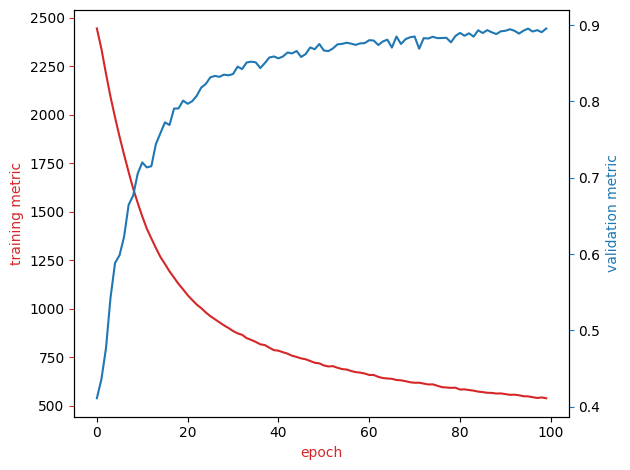

In [110]:
plot_results(loss_list, acc_list)

##### Test accuracy

In [112]:
evaluate(model, test_dataloader)

0.8838157894736842

##### Make predictions with the trained model

In [113]:
def predict(text, text_pipeline):
    with torch.no_grad():
        text = torch.unsqueeze(torch.tensor(text_pipeline(text)),0).to(device)
        output = model(text)
        return ag_news_label[output.argmax(1).item()+1]
    
article="""Canada navigated a stiff test against the Republic of Ireland on a rain soaked evening in Perth, coming from behind to claim a vital 2-1 victory at the Women’s World Cup.
Katie McCabe opened the scoring with an incredible Olimpico goal – scoring straight from a corner kick – as her corner flew straight over the despairing Canada goalkeeper Kailen Sheridan at Perth Rectangular Stadium in Australia.
Just when Ireland thought it had safely navigated itself to half time with a lead, Megan Connolly failed to get a clean connection on a clearance with the resulting contact squirming into her own net to level the score.
Minutes into the second half, Adriana Leon completed the turnaround for the Olympic champion, slotting home from the edge of the area to seal the three points."""

prediction = predict(article, text_pipeline)
print(f"The article is classified as: {prediction}\n")

The article is classified as: Sports



### Generative Pretrained Transformer (GPT) - Decoder (IMDB)

#### Prepare the data

In [114]:
from torchtext.vocab import build_vocab_from_iterator

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

IMDB_train_iter = iter(IMDB_train)

""" Make tokenized iterator from data iterator """
tokenizer = get_tokenizer("basic_english")
def yield_tokens(data_iter):
    for _, text in data_iter:
        yield tokenizer(text)  # Lowercase conversion for consistency
tokenized_iter = yield_tokens(IMDB_train_iter)

""" Build vocabulary from tokenized iterator """
# Define special symbols and indices
UNK_IDX, PAD_IDX, EOS_IDX = 0, 1, 2
# Make sure the tokens are in order of their indices to properly insert them in vocab
special_symbols = ['<unk>', '<pad>', '<|endoftext|>' ]
vocab = build_vocab_from_iterator(tokenized_iter, specials=special_symbols, special_first=True)
vocab.set_default_index(UNK_IDX)

#### Collate function and DataLoader

In [115]:
from torch.nn.utils.rnn import pad_sequence

def text_pipeline(text):
    tokenized = tokenizer(text)
    if isinstance(tokenized, list):
        return [vocab[x] for x in tokenized]
    elif isinstance(tokenized, str):
        return [vocab[text]]

def index_to_en(seq_en): 
    return " ".join([vocab.get_itos()[index] for index in seq_en])

BLOCK_SIZE=30

def get_sample(block_size, text):
    # Determine the length of the input text
    sample_leg = len(text)
    # Calculate the stopping point for randomly selecting a sample
    # This ensures the selected sample doesn't exceed the text length
    random_sample_stop = sample_leg - block_size


    # Check if a random sample can be taken (if the text is longer than block_size)
    if random_sample_stop >= 1:
        # Randomly select a starting point for the sample
        # random_start = torch.randint(low=0, high=random_sample_stop, size=(1,)).item()
        random_start = 0
        # Define the endpoint of the sample
        stop = random_start + block_size

        # Create the input and target sequences
        src_sequence = text[random_start:stop]
        tgt_sequence= text[random_start + 1:stop + 1]

    # Handle the case where the text length is exactly equal or less the block size
    elif random_sample_stop <= 0:
        # Start from the beginning and use the entire text
        random_start = 0
        stop = sample_leg
        src_sequence= text[random_start:stop]
        tgt_sequence = text[random_start + 1:stop]
        # Append an empty string to maintain sequence alignment
        tgt_sequence.append(EOS_IDX)

    return src_sequence, tgt_sequence

In [116]:
_, text = next(iter(IMDB_train))
src_seq, tgt_seq = get_sample(BLOCK_SIZE, text_pipeline(text))
print(f"Source Sequence (Indices): {src_seq} \n\nTarget Sequence (Indices): {tgt_seq}")

Source Sequence (Indices): [14, 1569, 14, 247, 35469, 44, 65, 399, 1136, 93, 8, 38, 3, 7127, 16, 3364, 12, 61, 12, 18, 95, 630, 13, 6922, 4, 14, 88, 554, 16, 39] 

Target Sequence (Indices): [1569, 14, 247, 35469, 44, 65, 399, 1136, 93, 8, 38, 3, 7127, 16, 3364, 12, 61, 12, 18, 95, 630, 13, 6922, 4, 14, 88, 554, 16, 39, 95]


In [117]:
from torch.nn.utils.rnn import pad_sequence

def collate_batch(batch):
    src_batch, tgt_batch = [], []
    for _,text in batch:
        src_sequence,tgt_sequence=get_sample(BLOCK_SIZE,text_pipeline(text))
        src_sequence= torch.tensor(src_sequence, dtype=torch.int64)
        tgt_sequence = torch.tensor(tgt_sequence, dtype=torch.int64)
        src_batch.append(src_sequence)
        tgt_batch.append(tgt_sequence)

    src_batch = pad_sequence(src_batch, padding_value=PAD_IDX, batch_first=False)
    tgt_batch = pad_sequence(tgt_batch, padding_value=PAD_IDX, batch_first=False)

    return tgt_batch.reshape(-1).to(device), src_batch.to(device)

In [119]:
from torch.utils.data import DataLoader
BATCH_SIZE=2

train_dataloader = DataLoader(IMDB_train, batch_size=BATCH_SIZE, shuffle=False, collate_fn=collate_batch)
valid_dataloader= DataLoader(IMDB_test, batch_size=BATCH_SIZE, shuffle=False, collate_fn=collate_batch)

In [120]:
dataset=iter(train_dataloader)
for sample in range(1):
    trt,src=next(dataset)
    print("sample",sample)
    print("source:",src)
    print("target:",trt)
    print("\n")

sample 0
source: tensor([[   14,    14],
        [ 1569,   247],
        [   14,  1990],
        [  247,  4406],
        [35469,    11],
        [   44,     7],
        [   65, 18157],
        [  399,     6],
        [ 1136,  1922],
        [   93,  8670],
        [    8,  2442],
        [   38,     4],
        [    3,    12],
        [ 7127,   160],
        [   16,    10],
        [ 3364,    28],
        [   12,   557],
        [   61,    55],
        [   12,    36],
        [   18,    10],
        [   95,    17],
        [  630,  1002],
        [   13,  2677],
        [ 6922,    32],
        [    4,    93],
        [   14,    15],
        [   88,    24],
        [  554,    59],
        [   16,   958],
        [   39,    35]])
target: tensor([ 1569,   247,    14,  1990,   247,  4406, 35469,    11,    44,     7,
           65, 18157,   399,     6,  1136,  1922,    93,  8670,     8,  2442,
           38,     4,     3,    12,  7127,   160,    16,    10,  3364,    28,
           12,   557

#### Define the model

In [121]:
from torch import nn
from torch import Tensor

class PositionalEncoding(nn.Module):
    
    """ Produces vectors with unique values for each position in a sequence, which are added to the embeddings"""

    def __init__(self, emb_size: int, max_seq_len: int = 5000, dropout: float = 0.1):
        super(PositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(p=dropout)

        position = torch.arange(0, max_seq_len, dtype=torch.float).unsqueeze(1)
        den = torch.exp(
            -torch.arange(0, emb_size, 2).float()
            * (math.log(10000.0) / emb_size)
        )
        pos_embedding = torch.zeros(max_seq_len, emb_size)
        pos_embedding[:, 0::2] = torch.sin(position * den)
        pos_embedding[:, 1::2] = torch.cos(position * den)        
        pos_embedding = pos_embedding.unsqueeze(-2)
        
        self.register_buffer("pos_embedding", pos_embedding)

    def forward(self, token_embedding: Tensor):
        x = token_embedding + self.pos_embedding[:token_embedding.size(0), :]
        return self.dropout(x)

In [122]:
class CustomGPTModel(nn.Module):
    def __init__(self, embed_size, vocab_size, num_heads, num_layers, max_seq_len=500, dropout=0.1, dim_feedforward=2048):

        super().__init__()
       
        self.embed = nn.Embedding(vocab_size, embed_size)
        self.positional_encoding = PositionalEncoding(embed_size, dropout=dropout, max_seq_len= max_seq_len)

        # Remaining layers are part of the TransformerDecoder
        encoder_layers = nn.TransformerEncoderLayer(d_model=embed_size, nhead=num_heads, dropout=dropout,
            dim_feedforward=dim_feedforward)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layers, num_layers=num_layers)
        
        self.embed_size = embed_size
        self.lm_head = nn.Linear(embed_size, vocab_size)
        
        self.init_weights()
        
    def init_weights(self):
        for p in self.parameters():
            if p.dim() > 1:
                nn.init.xavier_uniform_(p)

    def create_mask(self, src):
        src_seq_len = src.shape[0]
        src_mask = nn.Transformer.generate_square_subsequent_mask(src_seq_len)
        src_padding_mask = (src == PAD_IDX).transpose(0, 1)
        return src_mask,src_padding_mask

    def forward(self,x):

        src_mask, src_padding_mask = self.create_mask(x)
        # Add positional embeddings to the input embeddings
        x = self.embed(x)* math.sqrt(self.embed_size) #src = self.embedding(src) * math.sqrt(self.d_model)
        x = self.positional_encoding(x)

        x = self.transformer_encoder(x, src_mask,src_padding_mask,is_causal=True)
        
        x = self.lm_head(x)

        return x.reshape(-1, x.shape[-1])

In [123]:
from torchinfo import summary

vocab_size = len(vocab)  # size of vocabulary
embedding_dim = 1000 # embedding dimension
nlayers = 2  # number of ``nn.TransformerEncoderLayer`` in ``nn.TransformerEncoder``
nhead = 2  # number of heads in ``nn.MultiheadAttention``
dropout = 0.2  # dropout probability

model = CustomGPTModel(embed_size=embedding_dim, num_heads=nhead, num_layers=nlayers, vocab_size=vocab_size,dropout=dropout, max_seq_len=BLOCK_SIZE).to(device)

summary(model, input_size=[(BLOCK_SIZE, BATCH_SIZE)], dtypes=[torch.long, torch.long]) # Provide an example input shape

/Users/isabelle/.local/lib/python3.12/site-packages/torch/nn/functional.py:5109: UserWarning: Support for mismatched src_key_padding_mask and mask is deprecated. Use same type for both instead.
  warnings.warn(


Layer (type:depth-idx)                        Output Shape              Param #
CustomGPTModel                                [60, 100685]              --
├─Embedding: 1-1                              [30, 2, 1000]             100,685,000
├─PositionalEncoding: 1-2                     [30, 2, 1000]             --
│    └─Dropout: 2-1                           [30, 2, 1000]             --
├─TransformerEncoder: 1-3                     [30, 2, 1000]             --
│    └─ModuleList: 2-2                        --                        --
│    │    └─TransformerEncoderLayer: 3-1      [30, 2, 1000]             8,107,048
│    │    └─TransformerEncoderLayer: 3-2      [30, 2, 1000]             8,107,048
├─Linear: 1-4                                 [30, 2, 100685]           100,785,685
Total params: 217,684,781
Trainable params: 217,684,781
Non-trainable params: 0
Total mult-adds (Units.GIGABYTES): 6.29
Input size (MB): 0.00
Forward/backward pass size (MB): 53.65
Params size (MB): 838.71
Estimat

#### Train the model

In [124]:
def evaluate(model, dataloader) -> float:
    model.eval()  # turn on evaluation mode
    total_loss, total_count= 0, 0
    with torch.no_grad():
        for tgt,src in dataloader:
            tgt = tgt.to(device)
            #seq_len = src.size(0)
            logits = model(src)
            total_loss +=  criterion(logits, tgt).item()
            total_count += src.shape[1]
    return total_loss / total_count

In [ ]:
LR=0.01
EPOCHS = 5
WEIGHT_DECAY = 0.01
BETAS = (0.9, 0.999)

criterion = torch.nn.CrossEntropyLoss(ignore_index=PAD_IDX)
optimizer = torch.optim.Adam(model.parameters(), lr=LR, weight_decay= WEIGHT_DECAY, betas=BETAS)
# scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 10000, gamma=0.9)
    
model,train_loss,val_loss  = train_model(model,
                                         train_dataloader,
                                         criterion,
                                         optimizer,
                                         num_epochs=EPOCHS, 
                                         # valid_dataloader = valid_dataloader,
                                         # evaluate = evaluate,
                                         has_offsets = False)

#### Evaluate

##### Training loss

In [ ]:
plot_results(train_loss)

### Transformers for Translation (Multi30k)

#### Prepare the data

In [126]:
from torchtext.vocab import build_vocab_from_iterator
from torchtext.data.utils import get_tokenizer
from typing import Iterable, List

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

""" Make tokenized iterator from data iterator """

tokenizer = {}
tokenizer[SRC_LANGUAGE] = get_tokenizer('spacy', language='de_core_news_sm')
tokenizer[TGT_LANGUAGE] = get_tokenizer('spacy', language='en_core_web_sm')

def yield_tokens(data_iter: Iterable, language: str) -> List[str]:
    # Define a mapping to associate the source and target languages
    # with their respective positions in the data samples.
    language_index = {SRC_LANGUAGE: 0, TGT_LANGUAGE: 1}

    # Iterate over each data sample in the provided dataset iterator
    for data_sample in data_iter:
        # Tokenize the data sample corresponding to the specified language
        # and yield the resulting tokens.
        yield tokenizer[language](data_sample[language_index[language]])
        

""" Build vocabulary from tokenized iterator """

# Define special symbols and indices
UNK_IDX, PAD_IDX, BOS_IDX, EOS_IDX = 0, 1, 2, 3
# Make sure the tokens are in order of their indices to properly insert them in vocab
special_symbols = ['<unk>', '<pad>', '<bos>', '<eos>']

vocab = {}
for ln in [SRC_LANGUAGE, TGT_LANGUAGE]:
    # Create torchtext's Vocab object
    vocab[ln] = build_vocab_from_iterator(yield_tokens(multi30k_sorted_train, ln),
                                                    min_freq=1,
                                                    specials=special_symbols,
                                                    special_first=True)
    vocab[ln].set_default_index(UNK_IDX)

    # Print the vocabulary size and sample tokens
    print(f"{ln} vocabulary size: {len(vocab[ln])}")
    print(f"{ln} sample vocabulary: {list(vocab[ln].get_stoi().values())[:10]}")
    print(f"{ln} sample tokens: {list(vocab[ln].get_stoi().keys())[:10]}\n")

de vocabulary size: 19214
de sample vocabulary: [19213, 19212, 19211, 19209, 19208, 19200, 19199, 19198, 19192, 19188]
de sample tokens: ['’s', '’', 'ürde', 'üppigem', 'übrigen', 'übertriebene', 'überstehendes', 'überspringt', 'überrascht', 'überlisten']

en vocabulary size: 10837
en sample vocabulary: [10835, 10834, 10833, 10832, 10829, 10827, 10826, 10825, 10824, 10820]
en sample tokens: ['zoom', 'zips', 'zippered', 'youngster', 'yellowed', 'yawns', 'yawing', 'yak', 'yacht', 'writhing']



#### Collate function and DataLoader

In [127]:
from torch.nn.utils.rnn import pad_sequence

# function to add BOS/EOS, flip source sentence and create tensor for input sequence indices
def add_BOS_EOS_flip(token_ids: List[int]):
    return torch.cat((torch.tensor([BOS_IDX]),
                      torch.flip(torch.tensor(token_ids), dims=(0,)),
                      torch.tensor([EOS_IDX])))

# function to add BOS/EOS and create tensor for input sequence indices
def add_BOS_EOS(token_ids: List[int]):
    return torch.cat((torch.tensor([BOS_IDX]),
                      torch.tensor(token_ids),
                      torch.tensor([EOS_IDX])))

# helper function to club together sequential operations
def sequential_transforms(*transforms):
    def func(txt_input):
        for transform in transforms:
            txt_input = transform(txt_input)
        return txt_input
    return func

# ``src`` and ``tgt`` language text pipeline to convert raw strings into tensors indices
text_pipeline = {}

text_pipeline[SRC_LANGUAGE] = sequential_transforms(tokenizer[SRC_LANGUAGE], #Tokenization
                                            vocab[SRC_LANGUAGE], #Numericalization
                                            add_BOS_EOS) # Add BOS/EOS & and create tensor

text_pipeline[TGT_LANGUAGE] = sequential_transforms(tokenizer[TGT_LANGUAGE], #Tokenization
                                            vocab[TGT_LANGUAGE], #Numericalization
                                            add_BOS_EOS) # Add BOS/EOS and create tensor

# function to collate data samples into batch tensors
def collate_fn(batch):
    src_batch, tgt_batch = [], []
    for src_sample, tgt_sample in batch:
        src_sequences = text_pipeline[SRC_LANGUAGE](src_sample.rstrip("\n"))
        src_sequences = torch.tensor(src_sequences, dtype=torch.int64)
        tgt_sequences = text_pipeline[TGT_LANGUAGE](tgt_sample.rstrip("\n"))
        tgt_sequences = torch.tensor(tgt_sequences, dtype=torch.int64)
        src_batch.append(src_sequences)
        tgt_batch.append(tgt_sequences)

    src_batch = pad_sequence(src_batch, padding_value=PAD_IDX,batch_first=True)
    tgt_batch = pad_sequence(tgt_batch, padding_value=PAD_IDX,batch_first=True)
    src_batch = src_batch.t()
    tgt_batch = tgt_batch.t()
    
    return src_batch.to(device), tgt_batch.to(device)

In [128]:
from torch.utils.data import DataLoader

BATCH_SIZE = 1

train_dataloader = DataLoader(multi30k_sorted_train, batch_size=BATCH_SIZE, collate_fn=collate_fn,drop_last=True)
valid_dataloader = DataLoader(multi30k_sorted_valid, batch_size=BATCH_SIZE, collate_fn=collate_fn,drop_last=True)

data_iter = (iter(train_dataloader))

#### Define the model

In [129]:
from torch import nn
from torch import Tensor

class PositionalEncoding(nn.Module):
    
    """ Produces vectors with unique values for each position in a sequence, which are added to the embeddings"""

    def __init__(self, emb_size: int, max_seq_len: int = 5000, dropout: float = 0.1):
        super(PositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(p=dropout)

        position = torch.arange(0, max_seq_len, dtype=torch.float).unsqueeze(1)
        den = torch.exp(
            -torch.arange(0, emb_size, 2).float()
            * (math.log(10000.0) / emb_size)
        )
        pos_embedding = torch.zeros(max_seq_len, emb_size)
        pos_embedding[:, 0::2] = torch.sin(position * den)
        pos_embedding[:, 1::2] = torch.cos(position * den)        
        pos_embedding = pos_embedding.unsqueeze(-2)
        
        self.register_buffer("pos_embedding", pos_embedding)

    def forward(self, token_embedding: Tensor):
        x = token_embedding + self.pos_embedding[:token_embedding.size(0), :]
        return self.dropout(x)

In [130]:
class TokenEmbedding(nn.Module):
    def __init__(self, vocab_size: int, emb_size):
        super(TokenEmbedding, self).__init__()
        self.embedding = nn.Embedding(vocab_size, emb_size)
        self.emb_size = emb_size

    def forward(self, tokens: Tensor):
        return self.embedding(tokens.long()) * math.sqrt(self.emb_size)

In [131]:
class Seq2SeqTransformer(nn.Module):
    def __init__(self,
                 num_encoder_layers: int,
                 num_decoder_layers: int,
                 emb_size: int,
                 nhead: int,
                 src_vocab_size: int,
                 tgt_vocab_size: int,
                 dim_feedforward: int = 512,
                 dropout: float = 0.1):
        super(Seq2SeqTransformer, self).__init__()

        self.src_tok_emb = TokenEmbedding(src_vocab_size, emb_size) # define an embedding for the source vocabulary
        self.tgt_tok_emb = TokenEmbedding(tgt_vocab_size, emb_size) # define an embedding for the target vocabulary
        self.positional_encoding = PositionalEncoding(emb_size, dropout=dropout) #positional encoder to preserve word order information
        
        # The encoder is composed of multiple layers, each containing self-attention mechanisms and feed-forward neural networks.
        # The decoder uses both the encoder's output and the previously generated tokens to predict the next token in the sequence.
        self.transformer = nn.Transformer(d_model=emb_size,
                                       nhead=nhead,
                                       num_encoder_layers=num_encoder_layers,
                                       num_decoder_layers=num_decoder_layers,
                                       dim_feedforward=dim_feedforward,
                                       dropout=dropout)
        
        self.generator = nn.Linear(emb_size, tgt_vocab_size)
        
        self.init_weights()
        
    def create_mask(self, src, tgt):
        src_seq_len = src.shape[0]
        tgt_seq_len = tgt.shape[0]

        tgt_mask = nn.Transformer.generate_square_subsequent_mask(tgt_seq_len)
        src_mask = torch.zeros((src_seq_len, src_seq_len),device=device).type(torch.bool)

        src_padding_mask = (src == PAD_IDX).transpose(0, 1)
        tgt_padding_mask = (tgt == PAD_IDX).transpose(0, 1)
        return src_mask, tgt_mask, src_padding_mask, tgt_padding_mask
        
    def init_weights(self):
        for p in self.parameters():
            if p.dim() > 1:
                nn.init.xavier_uniform_(p)

    def forward(self,
                src: Tensor,
                trg: Tensor, # during training, trg is the full true output sequence; during inference, trg is the current generated sequence, increasing by one token for each loop
               ):
        
        src_mask, tgt_mask, src_padding_mask, tgt_padding_mask = self.create_mask(src, trg)
        
        src_emb = self.positional_encoding(self.src_tok_emb(src)) # source language text (the input sequence) is tokenized
        tgt_emb = self.positional_encoding(self.tgt_tok_emb(trg)) # target language text (the target sequence) is tokenized
        outs = self.transformer(src_emb, tgt_emb, src_mask, tgt_mask, None,
                                src_padding_mask, tgt_padding_mask, src_padding_mask)
        outs =outs.to(device)
        return self.generator(outs)

#     def encode(self, src: Tensor, src_mask: Tensor):
#         return self.transformer.encoder(self.positional_encoding(
#                             self.src_tok_emb(src)), src_mask)

#     def decode(self, tgt: Tensor, memory: Tensor, tgt_mask: Tensor):
#         return self.transformer.decoder(self.positional_encoding(
#                           self.tgt_tok_emb(tgt)), memory,
#                           tgt_mask)



In [132]:
from torchinfo import summary
torch.manual_seed(0)

SRC_VOCAB_SIZE = len(vocab[SRC_LANGUAGE])
TGT_VOCAB_SIZE = len(vocab[TGT_LANGUAGE])
EMB_SIZE = 512
NHEAD = 8
FFN_HID_DIM = 512
BATCH_SIZE = 128
NUM_ENCODER_LAYERS = 3
NUM_DECODER_LAYERS = 3

model = Seq2SeqTransformer(NUM_ENCODER_LAYERS, NUM_DECODER_LAYERS, EMB_SIZE,
                                 NHEAD, SRC_VOCAB_SIZE, TGT_VOCAB_SIZE, FFN_HID_DIM).to(device)

SEQ_LEN=10
summary(model, input_size=[(SEQ_LEN, BATCH_SIZE), (SEQ_LEN-2, BATCH_SIZE)], dtypes=[torch.long, torch.long]) # Provide an example input shape

/Users/isabelle/.local/lib/python3.12/site-packages/torch/nn/functional.py:5109: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(


Layer (type:depth-idx)                             Output Shape              Param #
Seq2SeqTransformer                                 [8, 128, 10837]           --
├─TokenEmbedding: 1-1                              [10, 128, 512]            --
│    └─Embedding: 2-1                              [10, 128, 512]            9,837,568
├─PositionalEncoding: 1-2                          [10, 128, 512]            --
│    └─Dropout: 2-2                                [10, 128, 512]            --
├─TokenEmbedding: 1-3                              [8, 128, 512]             --
│    └─Embedding: 2-3                              [8, 128, 512]             5,548,544
├─PositionalEncoding: 1-4                          [8, 128, 512]             --
│    └─Dropout: 2-4                                [8, 128, 512]             --
├─Transformer: 1-5                                 [8, 128, 512]             --
│    └─TransformerEncoder: 2-5                     [10, 128, 512]            --
│    │    └─ModuleLis

#### Train the model

In [136]:
def evaluate(model, dataloader):
    model.eval()
    losses = 0

    for src, tgt in dataloader:

        tgt_input = tgt[:-1, :]
        tgt_out = tgt[1:, :]
        
        logits = model(src, tgt_input)
        
        loss = criterion(logits.reshape(-1, logits.shape[-1]), tgt_out.reshape(-1))
        losses += loss.item()

    return losses / len(list(dataloader))

In [137]:
from tqdm import tqdm

def train_model(model, dataloader, criterion, optimizer, num_epochs=10, valid_dataloader = None, evaluate = None):
    
    train_loss = [] # List to store running loss for each epoch
    val_loss=[]
    len_dataloader = len(list(train_dataloader))
    train_iterator = tqdm(dataloader, desc="Training", leave=False)
    
    for epoch in range(1, num_epochs+1): # Using tqdm for a progress bar
        
        model.train()
        cum_loss = 0.0 # Storing running loss values for the current epoch
        
        
        
        for (src, tgt) in train_iterator:
            optimizer.zero_grad()
            
            tgt_input = tgt[:-1, :]
            tgt_out = tgt[1:, :]
            
            logits = model(src, tgt_input).to(device)
                      
            loss = criterion(logits.reshape(-1, logits.shape[-1]), tgt_out.reshape(-1))
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), 0.1)
            optimizer.step()
            cum_loss += loss.item()
            
            # Update tqdm progress bar with the current loss
            train_iterator.set_postfix(loss=loss.item())

        train_loss.append(cum_loss/len_dataloader)  # Append average loss for the epoch# Append average loss for the epoch
              
        if valid_dataloader is not None and evaluate is not None: 
            val_loss.append(evaluate(model, valid_dataloader))
            
    return model, train_loss, val_loss

In [138]:
BATCH_SIZE = 128

train_dataloader = DataLoader(multi30k_sorted_train, batch_size=BATCH_SIZE, collate_fn=collate_fn,drop_last=True)
valid_dataloader = DataLoader(multi30k_sorted_valid, batch_size=BATCH_SIZE, collate_fn=collate_fn,drop_last=True)


model = Seq2SeqTransformer(NUM_ENCODER_LAYERS, NUM_DECODER_LAYERS, EMB_SIZE,
                                 NHEAD, SRC_VOCAB_SIZE, TGT_VOCAB_SIZE, FFN_HID_DIM).to(device)

criterion = nn.CrossEntropyLoss(ignore_index=PAD_IDX)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001, betas=(0.9, 0.98), eps=1e-9)

EPOCHS = 5

# You can also use this section to suppress warnings generated by your code:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')
    
model,train_loss,val_loss  = train_model(model,
                                         train_dataloader,
                                         criterion,
                                         optimizer,
                                         num_epochs=EPOCHS, 
                                         valid_dataloader = valid_dataloader,
                                         evaluate = evaluate,
                                         )

#### Evaluate

##### Training and validation loss

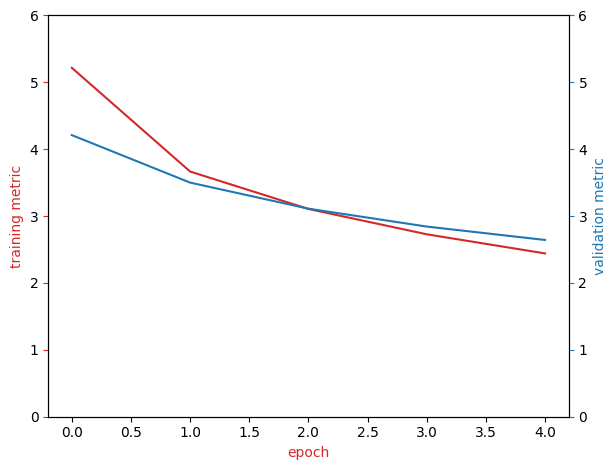

In [139]:
y_lim=(0, 6)
plot_results(train_loss, val_loss,y_lim)

##### Generate translations with the trained model

In [140]:
def greedy_decode(model, src , max_len, start_symbol):
    src = src.to(device)

    ys = torch.ones(1, 1).fill_(start_symbol).type(torch.long).to(device)
    for i in range(max_len-1):
        
        logits = model(src, ys).to(device)
        _, next_token = torch.max(logits[-1,:], dim=1)
        next_token = next_token.item()
        
        ys = torch.cat([ys,
                        torch.ones(1, 1).type_as(src.data).fill_(next_token)], dim=0)
        if next_token == EOS_IDX:
            break
    return ys

# translate input sentence into target language
def translate(model: torch.nn.Module, src_sentence: str):
    model.eval()
    src = text_pipeline[SRC_LANGUAGE](src_sentence).view(-1, 1)
    num_tokens = src.shape[0]
    tgt_tokens = greedy_decode(
        model,  src, max_len=num_tokens + 5, start_symbol=BOS_IDX).flatten()
    return " ".join(vocab[TGT_LANGUAGE].lookup_tokens(list(tgt_tokens.cpu().numpy()))).replace("<bos>", "").replace("<eos>", "")

In [149]:
model.load_state_dict(torch.load('saved_models/transformer-TR-model.pt', map_location=device, ))

for n in range(2):
    german, english= next(data_iter)

    print("German Sentence:",vocab[SRC_LANGUAGE].lookup_tokens(list(german)))
    print("English Translation:",vocab[TGT_LANGUAGE].lookup_tokens(list(english)))
    print("Model Translation:",translate(model," ".join(vocab[SRC_LANGUAGE].lookup_tokens(list(german))).replace("<bos>", "").replace("<eos>", "")))
    print("_________\n")

German Sentence: ['<bos>', '<eos>']
English Translation: ['<bos>', '<eos>']
Model Translation:  A line of people . 
_________

German Sentence: ['<bos>', '@@', '<eos>']
English Translation: ['<bos>', 'Front', 'stroke', 'swimming', 'race', 'roped', 'off', 'lap', 'areas', '.', '<eos>']
Model Translation:  Small girls swimming pool . 
_________



##### BLEU Score

In [150]:
from nltk.translate.bleu_score import sentence_bleu

def calculate_bleu_score(generated_translation, reference_translations):
    # convert the generated translations and reference translations into the expected format for sentence_bleu
    references = [reference.split() for reference in reference_translations]
    hypothesis = generated_translation.split()

    # calculate the BLEU score
    bleu_score = sentence_bleu(references, hypothesis)

    return bleu_score

generated_translation = translate(model,"Ein brauner Hund spielt im Schnee .")
print(generated_translation)
reference_translations = [
    "A brown dog is playing in the snow .",
    "A brown dog plays in the snow .",
    "A brown dog is frolicking in the snow .",
    "In the snow, a brown dog is playing ."

]

bleu_score = calculate_bleu_score(generated_translation, reference_translations)
print("BLEU Score:", bleu_score, "for",generated_translation)

 A brown dog is playing in the snow . 
BLEU Score: 1.0 for  A brown dog is playing in the snow . 


## Fine-tuning models

### Transformers for Sentiment Analysis (AG News & IMDB)

#### Prepare the data

In [151]:
import torchtext
from torch.utils.data.dataset import random_split
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import GloVe

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

""" Define tokenizer """
tokenizer = get_tokenizer("basic_english")

""" Use the vocab from the pre-trained GloVe embedding model """
glove_vectors_6B = GloVe(name ='6B', dim=100) 
vocab = torchtext.vocab.vocab(glove_vectors_6B.stoi, 0,specials=('<unk>', '<pad>'))
vocab.set_default_index(vocab["<unk>"])

""" Split dataset for pre-training into training and validation """

# Determine the number of samples to be used for training and validation (5% for validation).
num_train = int(len(ag_news_train_dataset) * 0.95)

# Randomly split the training dat aset into training and validation datasets using `random_split`.
# The training dataset will contain 95% of the samples, and the validation dataset will contain the remaining 5%.
ag_news_split_train_, ag_news_split_valid_ = random_split(ag_news_train_dataset, [num_train, len(ag_news_train_dataset) - num_train])

""" Split dataset for fine-tuning into training and validation """

# Determine the number of samples to be used for training and validation (5% for validation).
num_train = int(len(IMDB_train_dataset) * 0.95)

# Randomly split the training dat aset into training and validation datasets using `random_split`.
# The training dataset will contain 95% of the samples, and the validation dataset will contain the remaining 5%.
IMDB_split_train_, IMDB_split_valid_ = random_split(IMDB_train_dataset, [num_train, len(IMDB_train_dataset) - num_train])

#### Collate function and DataLoader

In [152]:
def label_pipeline(x):
    return int(x) - 1

def text_pipeline(x):
    return vocab(tokenizer(x))

##### Pre-training data (AG News)

In [153]:
from torch.nn.utils.rnn import pad_sequence

def collate_batch_ag_news(batch):
    label_list, text_list = [], []
    for _label, _text in batch:
        label_list.append(label_pipeline(_label))
        text_list.append(torch.tensor(text_pipeline(_text), dtype=torch.int64))


    label_list = torch.tensor(label_list, dtype=torch.int64)
    text_list = pad_sequence(text_list, batch_first=True)

    return label_list.to(device), text_list.to(device)

In [154]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader_ag_news = DataLoader(ag_news_split_train_, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_batch_ag_news)
valid_dataloader_ag_news = DataLoader(ag_news_split_valid_, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_batch_ag_news)
test_dataloader_ag_news = DataLoader(ag_news_test_dataset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_batch_ag_news)

##### Fine-tuning data (IMDB)

In [155]:
def collate_batch_IMDB(batch):
    label_list, text_list = [], []
    for _label, _text in batch:

        label_list.append(label_pipeline(_label))
        text_list.append(torch.tensor(text_pipeline(_text), dtype=torch.int64))

    label_list = torch.tensor(label_list, dtype=torch.int64)
    text_list = pad_sequence(text_list, batch_first=True)

    return label_list.to(device), text_list.to(device)

In [156]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader_IMDB = DataLoader(IMDB_split_train_, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_batch_IMDB)
valid_dataloader_IMDB = DataLoader(IMDB_split_valid_, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_batch_IMDB)
test_dataloader_IMDB = DataLoader(IMDB_test_dataset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_batch_IMDB)

#### Define the model

In [157]:
from torch import nn
from torch import Tensor

class PositionalEncoding(nn.Module):
    
    """ Produces vectors with unique values for each position in a sequence, which are added to the embeddings"""

    def __init__(self, emb_size: int, max_seq_len: int = 5000, dropout: float = 0.1):
        super(PositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(p=dropout)

        position = torch.arange(0, max_seq_len, dtype=torch.float).unsqueeze(1)
        den = torch.exp(
            -torch.arange(0, emb_size, 2).float()
            * (math.log(10000.0) / emb_size)
        )
        pos_embedding = torch.zeros(max_seq_len, emb_size)
        pos_embedding[:, 0::2] = torch.sin(position * den)
        pos_embedding[:, 1::2] = torch.cos(position * den)        
        pos_embedding = pos_embedding.unsqueeze(0)
        
        self.register_buffer("pos_embedding", pos_embedding)

    def forward(self, token_embedding: Tensor):
        x = token_embedding + self.pos_embedding[:,:token_embedding.size(1), :]
        return self.dropout(x)

In [158]:
class Transformer_TextClassifier(nn.Module):

    def __init__(self, num_class, vocab_size, freeze=True, nhead=2, dim_feedforward=128, num_layers=2, dropout=0.1, 
                 activation="relu", classifier_dropout=0.1):

        super().__init__()

        self.emb = nn.Embedding.from_pretrained(glove_vectors_6B.vectors,freeze=freeze)
        embedding_dim = self.emb.embedding_dim

        self.pos_encoder = PositionalEncoding(
            emb_size=embedding_dim,
            dropout=dropout,
            max_seq_len=5000,
        )

        encoder_layer = nn.TransformerEncoderLayer(
            d_model=embedding_dim,
            nhead=nhead,
            dim_feedforward=dim_feedforward,
            dropout=dropout,
        )
        self.transformer_encoder = nn.TransformerEncoder(
            encoder_layer,
            num_layers=num_layers,
        )
        self.classifier = nn.Linear(embedding_dim, num_class)
        self.d_model = embedding_dim

    def forward(self, x):
        x = self.emb(x) * math.sqrt(self.d_model)
        x = self.pos_encoder(x)
        x = self.transformer_encoder(x)
        x = x.mean(dim=1)
        x = self.classifier(x)

        return x


In [159]:
from torchinfo import summary

num_class_ag_news = len(set([label for (label, text) in ag_news_train_dataset ]))
num_class_IMDB = len(set([label for (label, text) in IMDB_train_dataset ]))
vocab_size=len(vocab)

model_ag_news = Transformer_TextClassifier(num_class=num_class_ag_news,vocab_size=vocab_size).to(device)
model_IMDB = Transformer_TextClassifier(num_class=num_class_IMDB,vocab_size=vocab_size).to(device)

SEQ_LEN=20
print(summary(model_ag_news, input_size=[BATCH_SIZE,SEQ_LEN], dtypes=[torch.long, torch.long])) # Provide an example input shape
print(summary(model_IMDB, input_size=[BATCH_SIZE,SEQ_LEN], dtypes=[torch.long, torch.long])) # Provide an example input shape

Layer (type:depth-idx)                        Output Shape              Param #
Transformer_TextClassifier                    [32, 4]                   --
├─Embedding: 1-1                              [32, 20, 100]             (40,000,000)
├─PositionalEncoding: 1-2                     [32, 20, 100]             --
│    └─Dropout: 2-1                           [32, 20, 100]             --
├─TransformerEncoder: 1-3                     [32, 20, 100]             --
│    └─ModuleList: 2-2                        --                        --
│    │    └─TransformerEncoderLayer: 3-1      [32, 20, 100]             66,628
│    │    └─TransformerEncoderLayer: 3-2      [32, 20, 100]             66,628
├─Linear: 1-4                                 [32, 4]                   404
Total params: 40,133,660
Trainable params: 133,660
Non-trainable params: 40,000,000
Total mult-adds (Units.GIGABYTES): 1.28
Input size (MB): 0.01
Forward/backward pass size (MB): 4.90
Params size (MB): 160.21
Estimated Total S

#### Pre-train the model (AG News dataset)

In [160]:
def evaluate(model, dataloader):
    model.eval()
    total_acc, total_count= 0, 0

    with torch.no_grad():
        for label, text in dataloader:
            label, text = label.to(device), text.to(device)
            output = model(text)
            predicted = torch.max(output.data, 1)[1]
            total_acc += (predicted == label).sum().item()
            total_count += label.size(0)
    return total_acc / total_count

In [163]:
LR=1
EPOCHS = 3

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_ag_news.parameters(), lr=LR)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 1.0, gamma=0.1)

model_ag_news,train_loss_ag_news,val_acc_ag_news  = train_model(model_ag_news,
                                                                train_dataloader_ag_news,
                                                                criterion,
                                                                optimizer,
                                                                num_epochs=EPOCHS, 
                                                                valid_dataloader = valid_dataloader_ag_news,
                                                                evaluate = evaluate,
                                                                has_offsets = False)


100%|████████████████████████████████████████████| 3/3 [05:06<00:00, 102.17s/it]


#### Full fine-tuning (IMDB dataset)

In [164]:
""" Copy pre-trained model weights to IMDB model """
model_full_finetune_IMDB = Transformer_TextClassifier(num_class=num_class_ag_news,vocab_size=vocab_size).to(device)
model_full_finetune_IMDB.load_state_dict(model_ag_news.state_dict())

""" Replace final layer (classifier) with a linear layer with output size = the number of classes of the IMDB model """
in_features = model_full_finetune_IMDB.classifier.in_features
model_full_finetune_IMDB.classifier = nn.Linear(in_features, num_class_IMDB)

In [165]:
LR=1
EPOCHS = 2
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_full_finetune_IMDB.parameters(), lr=LR)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 1.0, gamma=0.1)

model_full_finetune_IMDB,train_loss_IMDB,val_acc_IMDB  = train_model(model_full_finetune_IMDB,
                                                                     train_dataloader_IMDB,
                                                                     criterion,
                                                                     optimizer,
                                                                     num_epochs=EPOCHS, 
                                                                     valid_dataloader = valid_dataloader_IMDB,
                                                                     evaluate = evaluate,
                                                                     has_offsets = False)

100%|████████████████████████████████████████████| 2/2 [08:00<00:00, 240.44s/it]


#### Selective fine-tuning (IMDB dataset)

In [168]:
""" Copy pre-trained model weights to IMDB model """
model_selective_finetune_IMDB = Transformer_TextClassifier(num_class=num_class_ag_news,vocab_size=vocab_size).to(device)
model_selective_finetune_IMDB.load_state_dict(model_ag_news.state_dict())


""" Freeze layers if only specific layers should be fine-tuned """
for name, param in model_selective_finetune_IMDB.named_parameters():
    print(f"{name} requires_grad: {param.requires_grad}")
    
# Freeze all layers in the model
for param in model_selective_finetune_IMDB.parameters():
    param.requires_grad = False
    
# Unfreeze the "linear2" and "classifier" layers:
for i in range(2):
    for param in model_selective_finetune_IMDB.transformer_encoder.layers[i].linear2.parameters():
        param.requires_grad = True
        
""" Replace final layer (classifier) with a linear layer with output size = the number of classes of the IMDB model """
in_features = model_selective_finetune_IMDB.classifier.in_features
model_selective_finetune_IMDB.classifier = nn.Linear(in_features, num_class_IMDB)
        
print("")       
for name, param in model_selective_finetune_IMDB.named_parameters():
    print(f"{name} requires_grad: {param.requires_grad}")

emb.weight requires_grad: False
transformer_encoder.layers.0.self_attn.in_proj_weight requires_grad: True
transformer_encoder.layers.0.self_attn.in_proj_bias requires_grad: True
transformer_encoder.layers.0.self_attn.out_proj.weight requires_grad: True
transformer_encoder.layers.0.self_attn.out_proj.bias requires_grad: True
transformer_encoder.layers.0.linear1.weight requires_grad: True
transformer_encoder.layers.0.linear1.bias requires_grad: True
transformer_encoder.layers.0.linear2.weight requires_grad: True
transformer_encoder.layers.0.linear2.bias requires_grad: True
transformer_encoder.layers.0.norm1.weight requires_grad: True
transformer_encoder.layers.0.norm1.bias requires_grad: True
transformer_encoder.layers.0.norm2.weight requires_grad: True
transformer_encoder.layers.0.norm2.bias requires_grad: True
transformer_encoder.layers.1.self_attn.in_proj_weight requires_grad: True
transformer_encoder.layers.1.self_attn.in_proj_bias requires_grad: True
transformer_encoder.layers.1.sel

In [ ]:
LR=1
EPOCHS = 2
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_selective_finetune_IMDB.parameters(), lr=LR)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 1.0, gamma=0.1)

model_selective_finetune_IMDB,train_loss_IMDB,val_acc_IMDB  = train_model(model_selective_finetune_IMDB,
                                                                          train_dataloader_IMDB,
                                                                          criterion,
                                                                          optimizer,
                                                                          num_epochs=EPOCHS, 
                                                                          valid_dataloader = valid_dataloader_IMDB,
                                                                          evaluate = evaluate,
                                                                          has_offsets = False)

#### Additive fine-tuning with adapters (IMDB dataset)

In [170]:
class FeatureAdapter(nn.Module):

    def __init__(self, bottleneck_size=50, model_dim=100):
        super().__init__()
        self.bottleneck_transform = nn.Sequential(
            nn.Linear(model_dim, bottleneck_size),  # Down-project to a smaller dimension
            nn.ReLU(),                             # Apply non-linearity
            nn.Linear(bottleneck_size, model_dim)  # Up-project back to the original dimension
        )

    def forward(self, x):
        
        transformed_features = self.bottleneck_transform(x)  # Transform features through the bottleneck
        output_with_residual = transformed_features + x      # Add the residual connection
        return output_with_residual
    
class Adapted(nn.Module):
    def __init__(self, linear,bottleneck_size=None):
        super(Adapted, self).__init__()
        self.linear = linear
        model_dim = linear.out_features
        if bottleneck_size is None:
            bottleneck_size = model_dim//2   # Define default bottleneck size as half the model_dim

        # Initialize FeatureAdapter with calculated bottleneck_size and model_dim
        self.adaptor = FeatureAdapter(bottleneck_size=bottleneck_size, model_dim=model_dim)

    def forward(self, x):
        # First, the input x is passed through the linear layer
        x=self.linear(x)
        # Then it's adapted using FeatureAdapter
        x= self.adaptor(x)
        return x

In [171]:
""" Copy pre-trained model weights to IMDB model """
model_adapters_finetune_IMDB = Transformer_TextClassifier(num_class=num_class_ag_news,vocab_size=vocab_size).to(device)
model_adapters_finetune_IMDB.load_state_dict(model_ag_news.state_dict())

for name, param in model_adapters_finetune_IMDB.named_parameters():
    print(f"{name} requires_grad: {param.requires_grad}")
    
""" Freeze all layers in the model """
for param in model_adapters_finetune_IMDB.parameters():
    param.requires_grad = False
    
""" Replace final layer (classifier) with a linear layer with output size = the number of classes of the IMDB model """
in_features = model_adapters_finetune_IMDB.classifier.in_features
model_adapters_finetune_IMDB.classifier = nn.Linear(in_features, num_class_IMDB)
    
""" Replace specific layers with layer + adapter """
N_layers=len(model_adapters_finetune_IMDB.transformer_encoder.layers)
for n in range(N_layers):
    encoder=model_adapters_finetune_IMDB.transformer_encoder.layers[n]
    if encoder.linear1:
        encoder.linear1=Adapted(encoder.linear1, bottleneck_size=24)

    if encoder.linear2:
        encoder.linear2=Adapted(encoder.linear2, bottleneck_size=24)
    
        
print("")       
for name, param in model_adapters_finetune_IMDB.named_parameters():
    print(f"{name} requires_grad: {param.requires_grad}")

emb.weight requires_grad: False
transformer_encoder.layers.0.self_attn.in_proj_weight requires_grad: True
transformer_encoder.layers.0.self_attn.in_proj_bias requires_grad: True
transformer_encoder.layers.0.self_attn.out_proj.weight requires_grad: True
transformer_encoder.layers.0.self_attn.out_proj.bias requires_grad: True
transformer_encoder.layers.0.linear1.weight requires_grad: True
transformer_encoder.layers.0.linear1.bias requires_grad: True
transformer_encoder.layers.0.linear2.weight requires_grad: True
transformer_encoder.layers.0.linear2.bias requires_grad: True
transformer_encoder.layers.0.norm1.weight requires_grad: True
transformer_encoder.layers.0.norm1.bias requires_grad: True
transformer_encoder.layers.0.norm2.weight requires_grad: True
transformer_encoder.layers.0.norm2.bias requires_grad: True
transformer_encoder.layers.1.self_attn.in_proj_weight requires_grad: True
transformer_encoder.layers.1.self_attn.in_proj_bias requires_grad: True
transformer_encoder.layers.1.sel

In [ ]:
LR=1
EPOCHS = 2
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_adapters_finetune_IMDB.parameters(), lr=LR)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 1.0, gamma=0.1)

model_adapters_finetune_IMDB,train_loss_IMDB,val_acc_IMDB  = train_model(model_adapters_finetune_IMDB,
                                                                          train_dataloader_IMDB,
                                                                          criterion,
                                                                          optimizer,
                                                                          num_epochs=EPOCHS, 
                                                                          valid_dataloader = valid_dataloader_IMDB,
                                                                          evaluate = evaluate,
                                                                          has_offsets = False)

#### LoRA (Low-Rank Adaptation) fine-tuning (IMDB dataset)

In [172]:
class LoRALayer(torch.nn.Module):
    def __init__(self, in_dim, out_dim, rank, alpha):
        super().__init__()
        std_dev = 1 / torch.sqrt(torch.tensor(rank).float())
        self.A = torch.nn.Parameter(torch.randn(in_dim, rank) * std_dev)       
        self.B = torch.nn.Parameter(torch.zeros(rank, out_dim))
        self.alpha = alpha

    def forward(self, x):
        x = self.alpha * (x @ self.A @ self.B)
        return x
    
class LinearWithLoRA(torch.nn.Module):
    def __init__(self, linear, rank, alpha):
        super().__init__()
        self.linear = linear.to(device)
        self.lora = LoRALayer(
            linear.in_features, linear.out_features, rank, alpha
        ).to(device)

    def forward(self, x):       
        return self.linear(x) + self.lora(x)

In [173]:
""" Copy pre-trained model weights to IMDB model """
model_lora_finetune_IMDB = Transformer_TextClassifier(num_class=num_class_ag_news,vocab_size=vocab_size).to(device)
model_lora_finetune_IMDB.load_state_dict(model_ag_news.state_dict())

for name, param in model_lora_finetune_IMDB.named_parameters():
    print(f"{name} requires_grad: {param.requires_grad}")
    
""" Freeze all layers in the model """
for param in model_lora_finetune_IMDB.parameters():
    param.requires_grad = False
    
""" Replace final layer (classifier) with a linear layer with output size = the number of classes of the IMDB model """
in_features = model_lora_finetune_IMDB.classifier.in_features
model_lora_finetune_IMDB.classifier = nn.Linear(in_features, num_class_IMDB)
    
""" Replace specific (linear) layers with layer + LoRA layer """
RANK = 2
ALPHA = 0.1

N_layers=len(model_lora_finetune_IMDB.transformer_encoder.layers)
for n in range(N_layers):
    encoder=model_lora_finetune_IMDB.transformer_encoder.layers[n]
    if encoder.linear1:
        encoder.linear1=LinearWithLoRA(encoder.linear1,rank=RANK, alpha=ALPHA).to(device)

    if encoder.linear2:
        encoder.linear2=LinearWithLoRA(encoder.linear2,rank=RANK, alpha=ALPHA).to(device)
    
        
print("")       
for name, param in model_lora_finetune_IMDB.named_parameters():
    print(f"{name} requires_grad: {param.requires_grad}")

emb.weight requires_grad: False
transformer_encoder.layers.0.self_attn.in_proj_weight requires_grad: True
transformer_encoder.layers.0.self_attn.in_proj_bias requires_grad: True
transformer_encoder.layers.0.self_attn.out_proj.weight requires_grad: True
transformer_encoder.layers.0.self_attn.out_proj.bias requires_grad: True
transformer_encoder.layers.0.linear1.weight requires_grad: True
transformer_encoder.layers.0.linear1.bias requires_grad: True
transformer_encoder.layers.0.linear2.weight requires_grad: True
transformer_encoder.layers.0.linear2.bias requires_grad: True
transformer_encoder.layers.0.norm1.weight requires_grad: True
transformer_encoder.layers.0.norm1.bias requires_grad: True
transformer_encoder.layers.0.norm2.weight requires_grad: True
transformer_encoder.layers.0.norm2.bias requires_grad: True
transformer_encoder.layers.1.self_attn.in_proj_weight requires_grad: True
transformer_encoder.layers.1.self_attn.in_proj_bias requires_grad: True
transformer_encoder.layers.1.sel

In [ ]:
LR=1
EPOCHS = 2
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_lora_finetune_IMDB.parameters(), lr=LR)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 1.0, gamma=0.1)

model_lora_finetune_IMDB,train_loss_IMDB,val_acc_IMDB  = train_model(model_lora_finetune_IMDB,
                                                                          train_dataloader_IMDB,
                                                                          criterion,
                                                                          optimizer,
                                                                          num_epochs=EPOCHS, 
                                                                          valid_dataloader = valid_dataloader_IMDB,
                                                                          evaluate = evaluate,
                                                                          has_offsets = False)

#### Evaluate

##### Training loss and validation accuracy

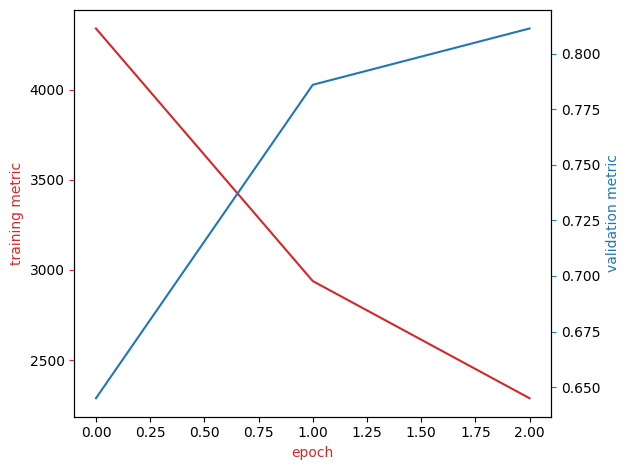

In [174]:
plot_results(train_loss_ag_news, val_acc_ag_news)

## Retrieval Augmented Generation (RAG)

### Bert encoder for retrieval

#### Prepare the data

In [175]:
song_inappropriate = """
This time the bullet cold rocked ya
A yellow ribbon instead of a swastika
Nothin' proper about ya propaganda
Fools follow rules when the set commands ya
Said it was blue, when ya blood was read
That's how ya got a bullet blasted through ya head
Blasted through ya head, blasted through ya head
I give a shout out to the living dead
Who stood and watched as the feds cold centralized
So serene on the screen, you were mesmerized
Cellular phones soundin' a death tone
Corporations cold turn ya to stone before ya realize
They load the clip in omnicolour
Said they pack the nine, they fire it at prime time
The sleeping gas, every home was like Alcatraz
And muthafuckas lost their minds
Just victims of the in-house drive-by
They say jump, you say how high? Yeah
Just victims of the in-house drive-by
They say jump, you say how high?
Run it
Just victims of the in-house drive-by
They say jump, you say how high? Yeah
Just victims of the in-house drive-by
They say jump, you say how high?
Checka, checka, check it out
They load the clip in omnicolor
Said they pack the nine, they fire it at prime time
The sleeping gas, every home was like Alcatraz
And muthafuckas lost their minds
No escape from the mass mind rape
Play it again Jack, and then rewind the tape
And then play it again and again and again
Until ya mind is locked in
Believin' all the lies that they're tellin' ya
Buyin' all the products that they're sellin' ya
They say jump, and ya say how high?
Ya braindead, ya gotta fuckin' bullet in ya head
Just victims of the in-house drive-by
They say jump, you say how high? Yeah
Just victims of the in-house drive-by
They say jump, you say how high?
Uh, yeah
Check, fuck
Ya standin' in line
Believin' the lies
Ya bowin' down to the flag
Ya gotta bullet in ya head
Ya standin' in line
Believin' the lies
Ya bowin' down to the flag
Ya gotta bullet in ya head
A bullet in ya head
A bullet in ya head
A bullet in ya head
A bullet in ya head
A bullet in ya head
A bullet in ya head
A bullet in ya head
A bullet in the head
A bullet in ya head
A bullet in ya head
A bullet in ya head
A bullet in ya head
A bullet in ya head
A bullet in ya head
A bullet in ya head
Ya gotta bullet in ya fuckin' head
Yeah, yeah
"""

In [176]:
song_appropriate = """
Sunny day
Sweepin' the clouds away
On my way to where the air is sweet
Can you tell me how to get
How to get to Sesame Street?

Come and play
Everything's A-okay
Friendly neighbors there
That's where we meet
Can you tell me how to get
How to get to Sesame Street?

It's a magic carpet ride
Every door will open wide
To happy people like you
Happy people like
What a beautiful

Sunny day
Sweepin' the clouds away
On my way to where the air is sweet
Can you tell me how to get
How to get to Sesame Street?
How to get to Sesame Street?
How to get to Sesame Street?
How to get to Sesame Street?
How to get to Sesame Street?
"""

In [177]:
song_questions = [
    "Does this song contain any violent themes, such as references to guns, killing, or physical aggression? Example: Does the song describe or promote physical violence, like fighting or shootings?",
    "Are there any explicit lyrics or bad words used in this song that might be considered offensive or inappropriate? Example: Does the song use language commonly recognized as profanity or derogatory terms?",
    "Is the overall content of this song suitable for children, considering its themes, language, and messages? Example: Are there elements in the song that could be deemed too mature or unsuitable for young listeners?",
    "Does this song explicitly mention weapons, such as guns, knives, or other similar items? Example: Are specific types of weapons described or glorified in the lyrics?",
    "Are the messages conveyed in this song positive and uplifting for children? Example: Does the song promote values like kindness, friendship, and positivity?",
    "Does this song include any sexual content, references to sexual behavior, or suggestive language? Example: Are there lyrics that explicitly or implicitly discuss sexual themes or experiences?",
    "Does this song offer any educational value, such as teaching the alphabet, basic math, or other learning content? Example: Are there educational segments in the song that could help children learn fundamental skills like the ABCs or counting?",
    "Does this song promote emotional resilience and social skills among children? Example: Does the song include themes of overcoming challenges or building friendships?"
]

yes_responses = [
    "Yes, this song contains violent themes, including references to guns, killing, or physical aggression, and is not suitable for children.",
    "Yes, this song includes explicit lyrics or bad words that might be considered offensive or inappropriate for young audiences.",
    "No, the overall content of this song is not suitable for children as it includes themes, language, and messages that are too mature or unsuitable for young listeners.",
    "Yes, this song explicitly mentions weapons, such as guns and knives, which could be disturbing or inappropriate for children’s entertainment.",
    "Yes, the messages conveyed in this song are positive and uplifting, promoting values like kindness, friendship, and positivity, beneficial for children.",
    "Yes, this song includes sexual content and references to sexual behavior or suggestive language, which are inappropriate for a child-friendly environment.",
    "Yes, this song offers significant educational value, including segments that teach the alphabet, basic math, and other learning content, making it both fun and educational for children.",
    "Yes, this song promotes emotional resilience and social skills, incorporating themes about overcoming challenges and building friendships, which are essential for children's development."
]

In [178]:
import re
def process_song(song):
    # Remove line breaks from the song
    song_new = re.sub(r'[\n]', ' ', song)
    
    # Remove single quotes from the song
    song_new = [song_new.replace("\'", "")]
    
    return song_new

#### Instantiate tokenizers & encoders for the context and questions 

In [179]:
from transformers import BertTokenizer, BertModel

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

""" Instantiate tokenizer and encoder for the context and questions """
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
encoder = BertModel.from_pretrained('bert-base-uncased').to(device)

#### Embed the context and questions

In [180]:
def encode_contexts_questions(text_list):
    # Encode a list of texts into embeddings
    embeddings = []
    for text in text_list:
        # Tokenize the context
        inputs = tokenizer.batch_encode_plus([text],add_special_tokens=True,padding=True,truncation=True)
        input_ids_tensors = torch.tensor(inputs['input_ids']).to(device)
        mask_tensors = torch.tensor(inputs['attention_mask']).to(device)

        # Encode the context to get the embedding
        with torch.no_grad():
            embedding = encoder(input_ids_tensors, attention_mask=mask_tensors)[0].squeeze(0)
        # Filter out the embeddings at positions where the mask is zero 
        valid_embeddings_mask = mask_tensors[0] != 0 
        valid_embeddings = embedding[valid_embeddings_mask,:]
        # Compute the mean of the filtered embeddings
        mean_embedding = valid_embeddings.mean(dim=0)
        embeddings.append(mean_embedding.unsqueeze(0))

    return torch.cat(embeddings) # Aggregation

In [181]:
context_embeddings_inappropriate=encode_contexts_questions(process_song(song_inappropriate))
context_embeddings_appropriate=encode_contexts_questions(process_song(song_appropriate))
question_embedding=encode_contexts_questions(song_questions)

#### Find similarity between questions and contexts using dot product

In [182]:
def RAG_QA_dotproduct(embeddings_questions, embeddings, n_responses=2):
    # Calculate the dot product between the question embeddings and the provided embeddings (transpose of the second matrix for proper alignment).
    dot_product = embeddings_questions @ embeddings.T

    # Reshape the dot product results to a 1D tensor for easier processing.
    dot_product = dot_product.reshape(-1)

    # Sort the indices of the dot product results in descending order (setting descending to False should be True for typical similarity tasks).
    sorted_indices = torch.argsort(dot_product, descending=True)

    # Convert sorted indices to a list for easier iteration.
    sorted_indices = sorted_indices.tolist()

    return [yes_responses[i] for i in sorted_indices[:n_responses]] 

In [183]:
print(f"Inappropriate lyrics:\n {RAG_QA_dotproduct(question_embedding, context_embeddings_inappropriate)}")
print(f"Appropriate lyrics:\n {RAG_QA_dotproduct(question_embedding, context_embeddings_appropriate)}")

Inappropriate lyrics:
 ['Yes, this song includes explicit lyrics or bad words that might be considered offensive or inappropriate for young audiences.', 'Yes, this song includes sexual content and references to sexual behavior or suggestive language, which are inappropriate for a child-friendly environment.']
Appropriate lyrics:
 ['Yes, the messages conveyed in this song are positive and uplifting, promoting values like kindness, friendship, and positivity, beneficial for children.', 'Yes, this song offers significant educational value, including segments that teach the alphabet, basic math, and other learning content, making it both fun and educational for children.']


#### Find similarity between questions and contexts using cosine similarity

In [184]:
def RAG_QA_cosine(embeddings_questions, embeddings, n_responses=3):
    # Calculate the magnitudes (norms) of the question and response embeddings
    question_norms = torch.norm(embeddings_questions, dim=1, keepdim=True)
    response_norms = torch.norm(embeddings, dim=1, keepdim=True)
    
    # Calculate the dot product between the question embeddings and the provided embeddings (transpose of the second matrix for proper alignment)
    dot_product = torch.mm(embeddings_questions, embeddings.T)
    
    # Calculate cosine similarity by dividing the dot product by the product of the magnitudes
    cosine_similarity = dot_product / (question_norms * response_norms.T)
    
    # Flatten the cosine similarity tensor to a 1D tensor for easier processing
    cosine_similarity = cosine_similarity.reshape(-1)
    
    # Sort the indices of the cosine similarity results in descending order to get the indices with the highest similarity
    sorted_indices = torch.argsort(cosine_similarity, descending=True)
    
    # Convert sorted indices to a list for easier iteration
    sorted_indices = sorted_indices.tolist()
    
    return [yes_responses[i] for i in sorted_indices[:n_responses]] 

In [185]:
print(f"Inappropriate lyrics:\n {RAG_QA_cosine(question_embedding, context_embeddings_inappropriate)}")
print(f"Appropriate lyrics:\n {RAG_QA_cosine(question_embedding, context_embeddings_appropriate)}")

Inappropriate lyrics:
 ['Yes, this song includes explicit lyrics or bad words that might be considered offensive or inappropriate for young audiences.', 'Yes, this song offers significant educational value, including segments that teach the alphabet, basic math, and other learning content, making it both fun and educational for children.', 'No, the overall content of this song is not suitable for children as it includes themes, language, and messages that are too mature or unsuitable for young listeners.']
Appropriate lyrics:
 ['Yes, this song offers significant educational value, including segments that teach the alphabet, basic math, and other learning content, making it both fun and educational for children.', 'Yes, the messages conveyed in this song are positive and uplifting, promoting values like kindness, friendship, and positivity, beneficial for children.', 'No, the overall content of this song is not suitable for children as it includes themes, language, and messages that are